All tables and plots for the paper

In [2]:
import seaborn as sns

sns.set_style("whitegrid")
palette = sns.color_palette("viridis")

FIGURES_DIR = "./figures/"
TABLES_DIR = "./tables/"

# Initial datasets D1-D10

| Test | Dataset Specs            | #D1   | #D2   | #Duplicates |
|------|--------------------------|-------|-------|-------------|
| D1   | Restaurants1-Restaurants2| 340   | 2257  | 89          |
| D2   | Abt-Buy                  | 1077  | 1076  | 1076        |
| D3   | Amazon-Google Products   | 1355  | 3040  | 1103        |
| D4   | DBLP-ACM                 | 2617  | 2295  | 2225        |
| D5   | IMDB-TMDB                | 5119  | 6057  | 1969        |
| D6   | IMDB-TVDB                | 5119  | 7811  | 1073        |
| D7   | TMDB-TVDB                | 6057  | 7811  | 1096        |
| D8   | Walmart-Amazon           | 2555  | 22075 | 853         |
| D9   | DBLP-Google Scholar      | 2517  | 61354 | 2309        |
| D10  | IMDB-DBPedia             | 27616 | 23183 | 22864       |


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataset_specs = pd.read_csv('./data/dataset_specs.csv')
dataset_specs

dataset  InputEntityProfiles  NumberOfAttributes  NumberOfDistinctValues  \
0      D1                 2595                  13                    4273   
1      D2                 2152                   3                    4383   
2      D3                 4393                   4                    9674   
3      D4                 4910                   4                    6592   
4      D5                11174                  37                   13624   
5      D6                12928                  18                   12471   
6      D7                13866                  31                   13834   
7      D8                24628                   6                   62834   
8      D9                63869                   4                  129067   
9     D10                50797                  10                  424346   

   NumberOfNameValuePairs  AverageNVPairsPerEntity  \
0                    8649                     3.33   
1                    4876                     2.27   
2                   14412                     3.28   
3                   19626                     4.00   
4                   45055                     4.03   
5                   42196                     3.26   
6                   44663                     3.22   
7                  128458                     5.22   
8                  208065                     3.26   
9                  971445                    19.12   

   AverageDistinctValuesPerEntity  AverageNVpairsPerAttribute  \
0                            1.65                      665.31   
1                            2.04                     1625.33   
2                            2.20                     3603.00   
3                            1.34                     4906.50   
4                            1.22                     1217.70   
5                            0.96                     2344.22   
6                            1.00                     1440.74   
7                            2.55                    21409.67   
8                            2.02                    52016.25   
9                            8.35                    97144.50   

   AverageDistinctValuesPerAttribute  NumberOfMissingNVpairs  \
0                             328.69                  4326.0   
1                            1461.00                  1580.0   
2                            2418.50                  3160.0   
3                            1648.00                    14.0   
4                             368.22                178425.0   
5                             692.83                 61228.0   
6                             446.26                232657.0   
7                           10472.33                 19310.0   
8                           32266.75                 47411.0   
9                           42434.60              65400000.0   

   AverageValueLength  AverageValueTokens  MaxValuesPerEntity  
0              107.71               20.59                   5  
1              197.28               39.85                   3  
2              585.15              103.27                   4  
3              129.75               23.01                   4  
4               81.20               17.00                  20  
5               73.93               14.62                   8  
6              100.66               20.40                  20  
7              102.34               23.85                   6  
8              108.15               19.38                   4  
9              283.02               62.72                1306

Per attribute values based on features extracted from the datasets

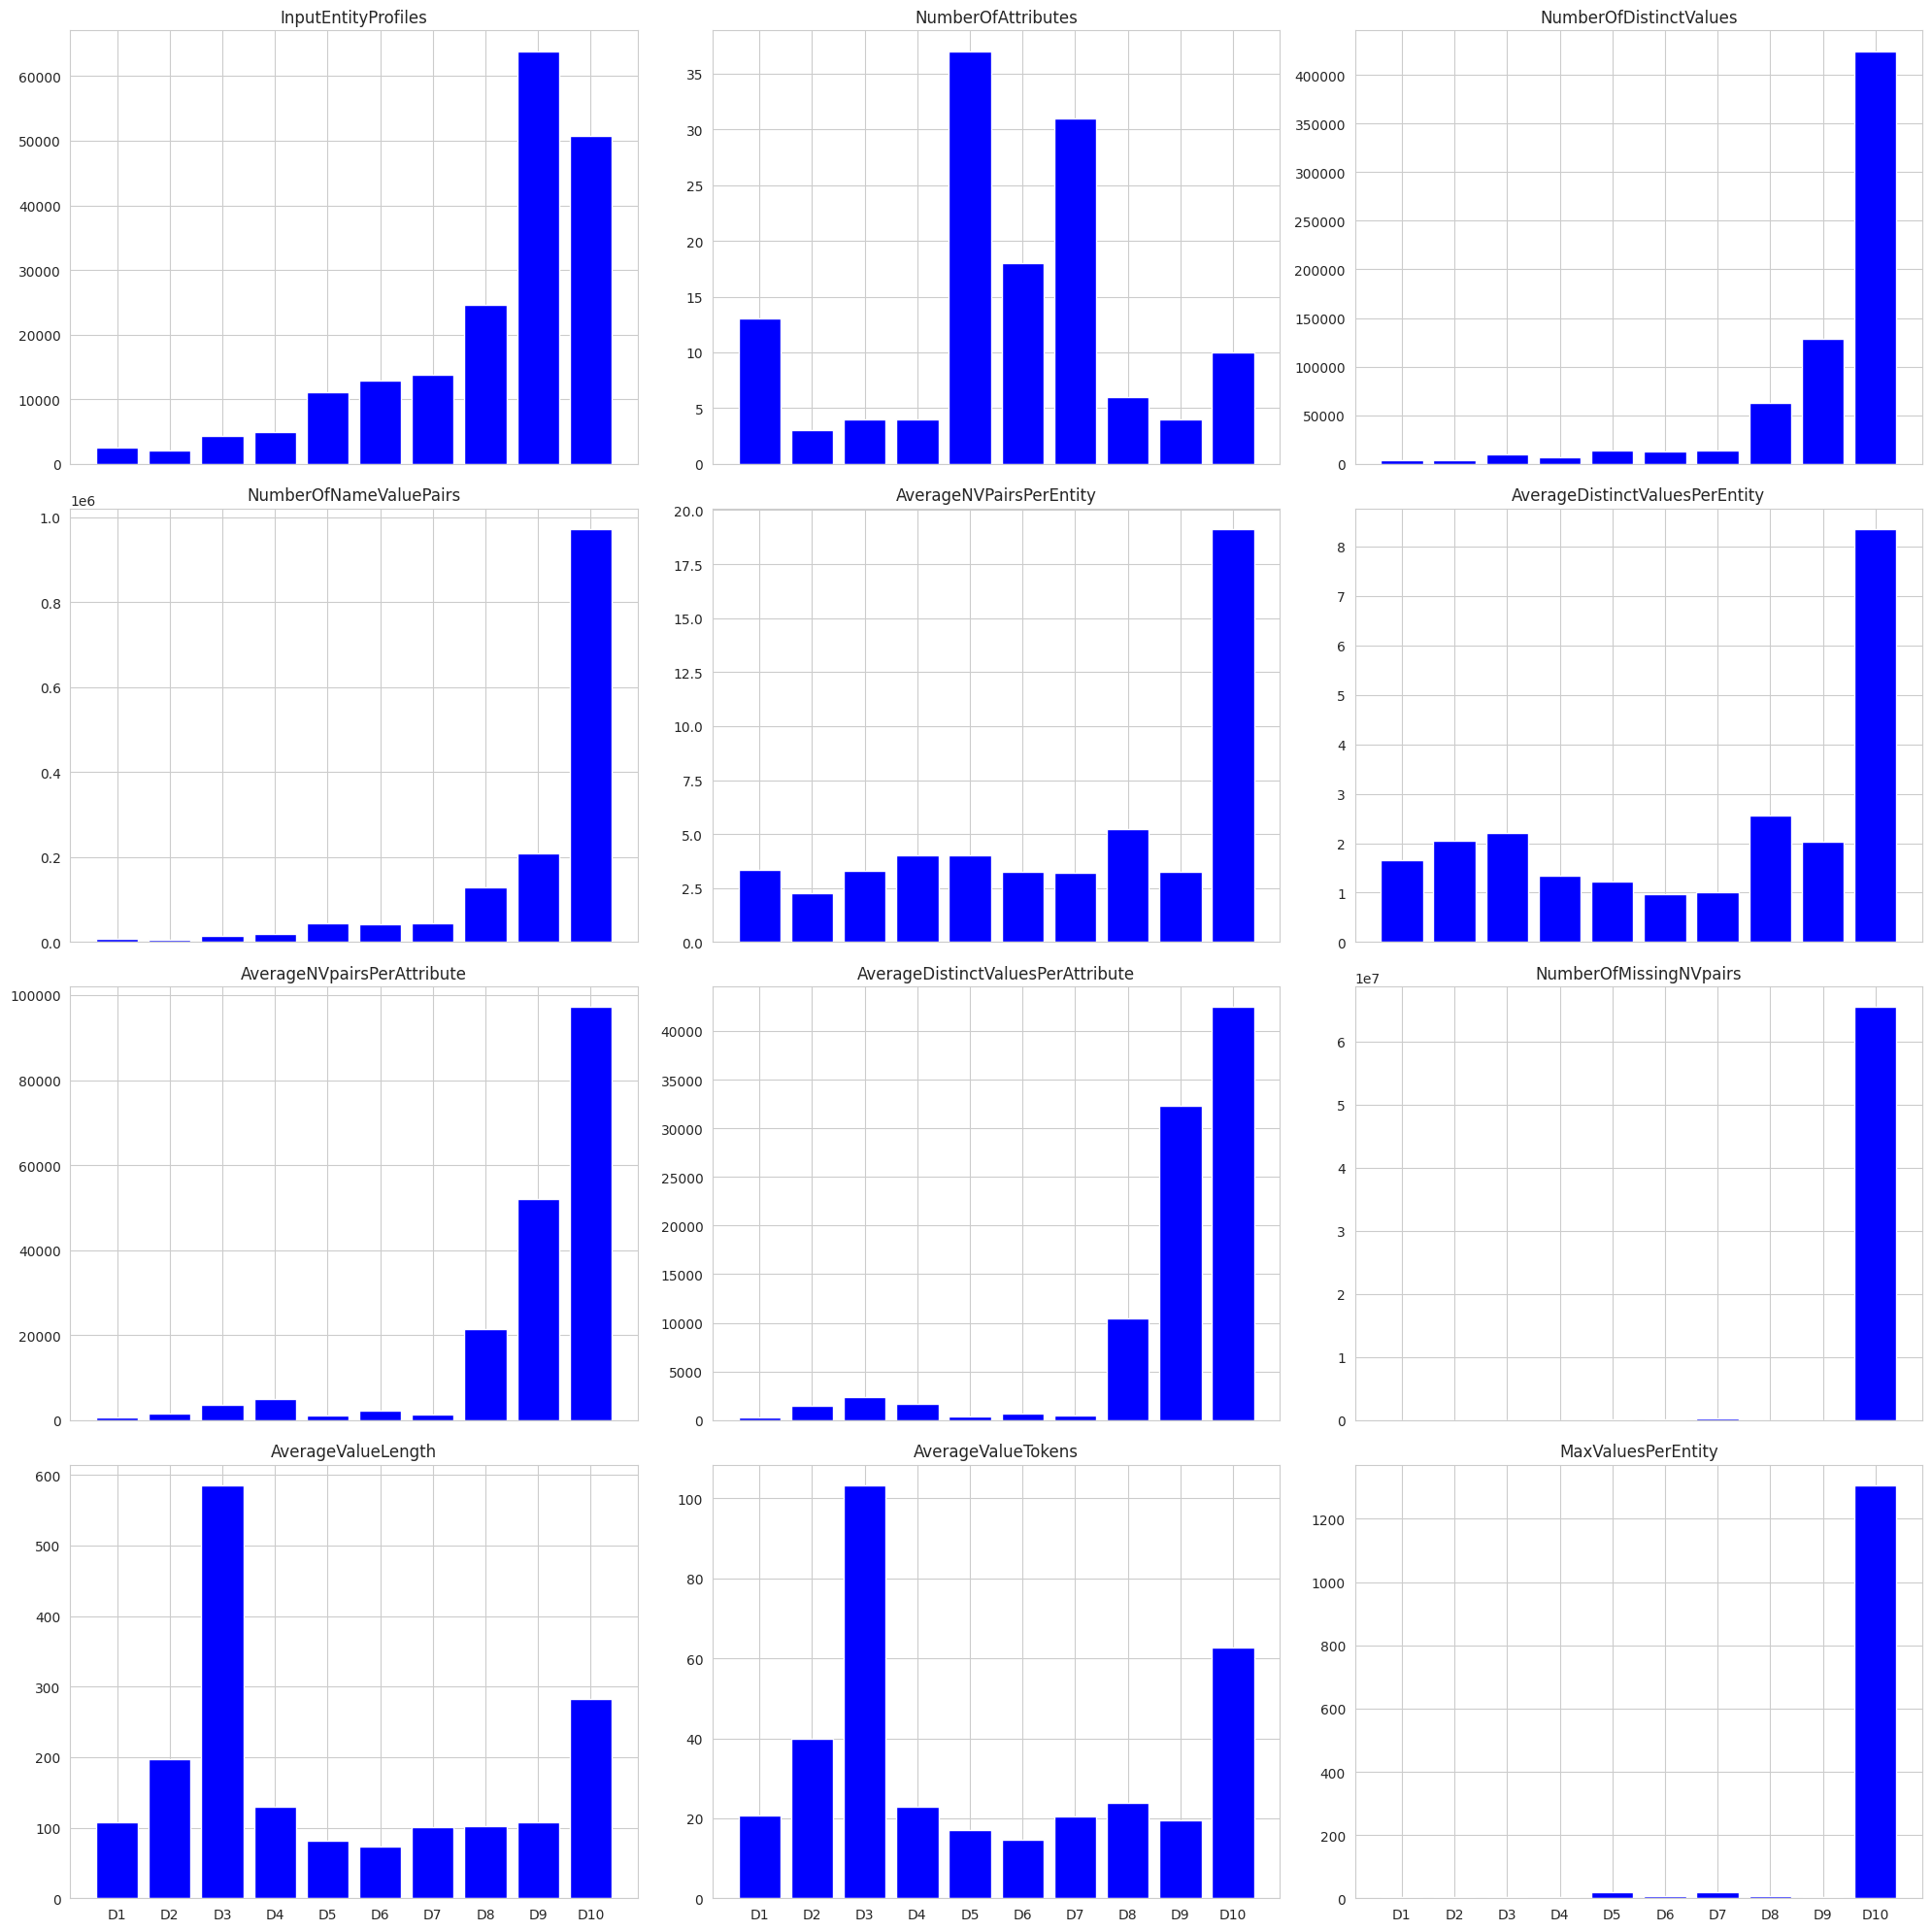

In [127]:
data=dataset_specs

columns_to_plot = [
    'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues',
    'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity',
    'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute',
    'NumberOfMissingNVpairs', 'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity'
]
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True)

axes = axes.flatten()

for ax, column in zip(axes, columns_to_plot):
    ax.bar(data['dataset'], data[column], color='blue')
    ax.set_title(f'{column}')
    # ax.set_xlabel('Dataset')
    # ax.set_ylabel(column)
    ax.set_xticks(range(len(data['dataset'])))
    ax.set_xticklabels(data['dataset'])

for ax in axes[len(columns_to_plot):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.savefig(FIGURES_DIR + 'dataset_specs.png')
plt.show()

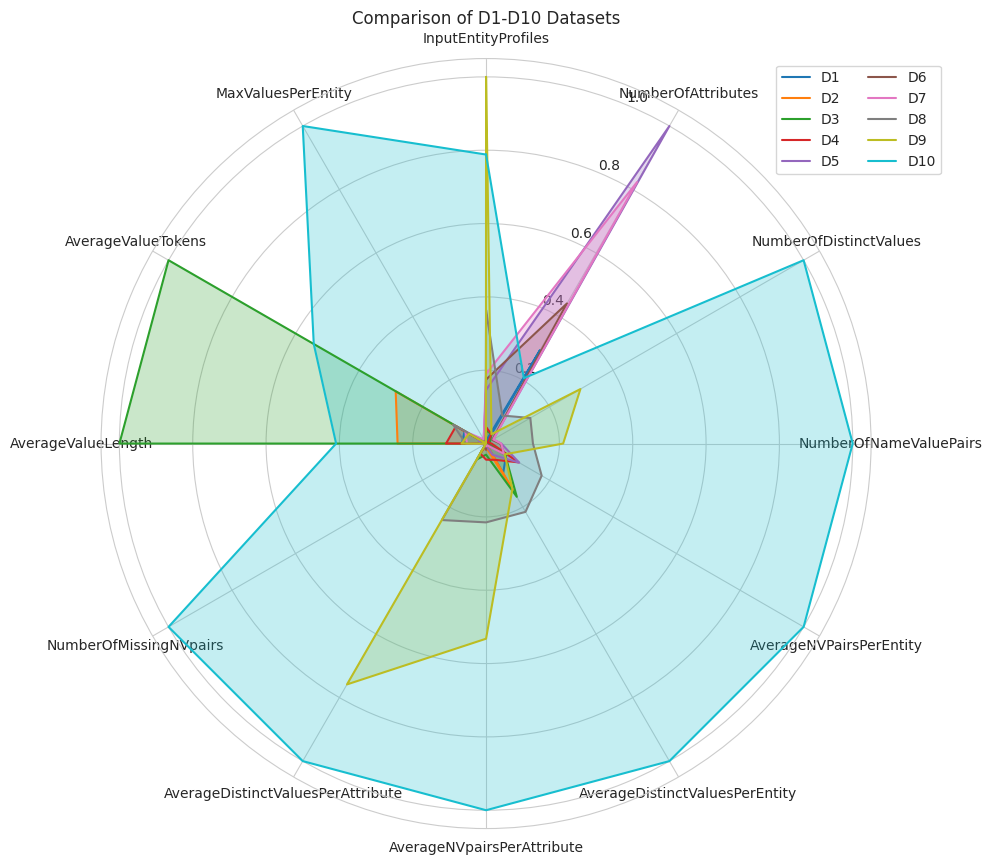

In [123]:
import numpy as np
data=dataset_specs
data_normalized = data.copy()
for column in columns_to_plot:
    data_normalized[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

def create_radar_chart(data, labels, title):
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels)
    
    ax.set_rscale('linear')
    
    for idx, row in data.iterrows():
        values = row[columns_to_plot].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['dataset'])
        ax.fill(angles, values, alpha=0.25)
    
    plt.title(title)
    plt.legend(loc='upper right', ncols=2, bbox_to_anchor=(1.1, 1.0))
    plt.savefig(FIGURES_DIR + 'dataset_specs_radar.png')
    plt.show()

create_radar_chart(data_normalized, columns_to_plot, 'Comparison of D1-D10 Datasets')


## CENSUS Synthetic dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

SyntheticDatasetsFeatures = pd.read_csv('./data/SyntheticDatasetsFeatures.csv')
SyntheticDatasetsFeatures

dataset  InputEntityProfiles  NumberOfAttributes  NumberOfDistinctValues  \
0     10K                10000                  12                   40361   
1     50K                50000                  12                  155887   
2    100K               100000                  12                  279360   
3    200K               200000                  12                  503318   
4    300K               300000                  12                  715644   
5      1M              1000000                  12                 2115158   
6      2M              2000000                  12                 3977094   

   NumberOfNameValuePairs  AverageNVPairsPerEntity  \
0                  106108                    10.61   
1                  530854                    10.62   
2                 1061421                    10.61   
3                 2123728                    10.62   
4                 3184885                    10.62   
5                10617729                    10.62   
6                21238252                    10.62   

   AverageDistinctValuesPerEntity  AverageNVpairsPerAttribute  \
0                            4.04                     8842.33   
1                            3.12                    44237.83   
2                            2.79                    88451.75   
3                            2.52                   176977.33   
4                            2.39                   265407.08   
5                            2.12                   884810.75   
6                            1.99                  1769854.33   

   AverageDistinctValuesPerAttribute  NumberOfMissingNVpairs  \
0                            3363.42                   13892   
1                           12990.58                   69146   
2                           23280.00                  138579   
3                           41943.17                  276272   
4                           59637.00                  415115   
5                          176263.17                 1382271   
6                          331424.50                 2761748   

   AverageValueLength  AverageValueTokens  MaxValuesPerEntity  
0           72.986000           13.127500                  12  
1           72.883720           13.119580                  12  
2           73.009590           13.130940                  12  
3           72.968470           13.132210                  12  
4           72.966600           13.126977                  12  
5           72.973857           13.131526                  12  
6           72.989530           13.134312                  12

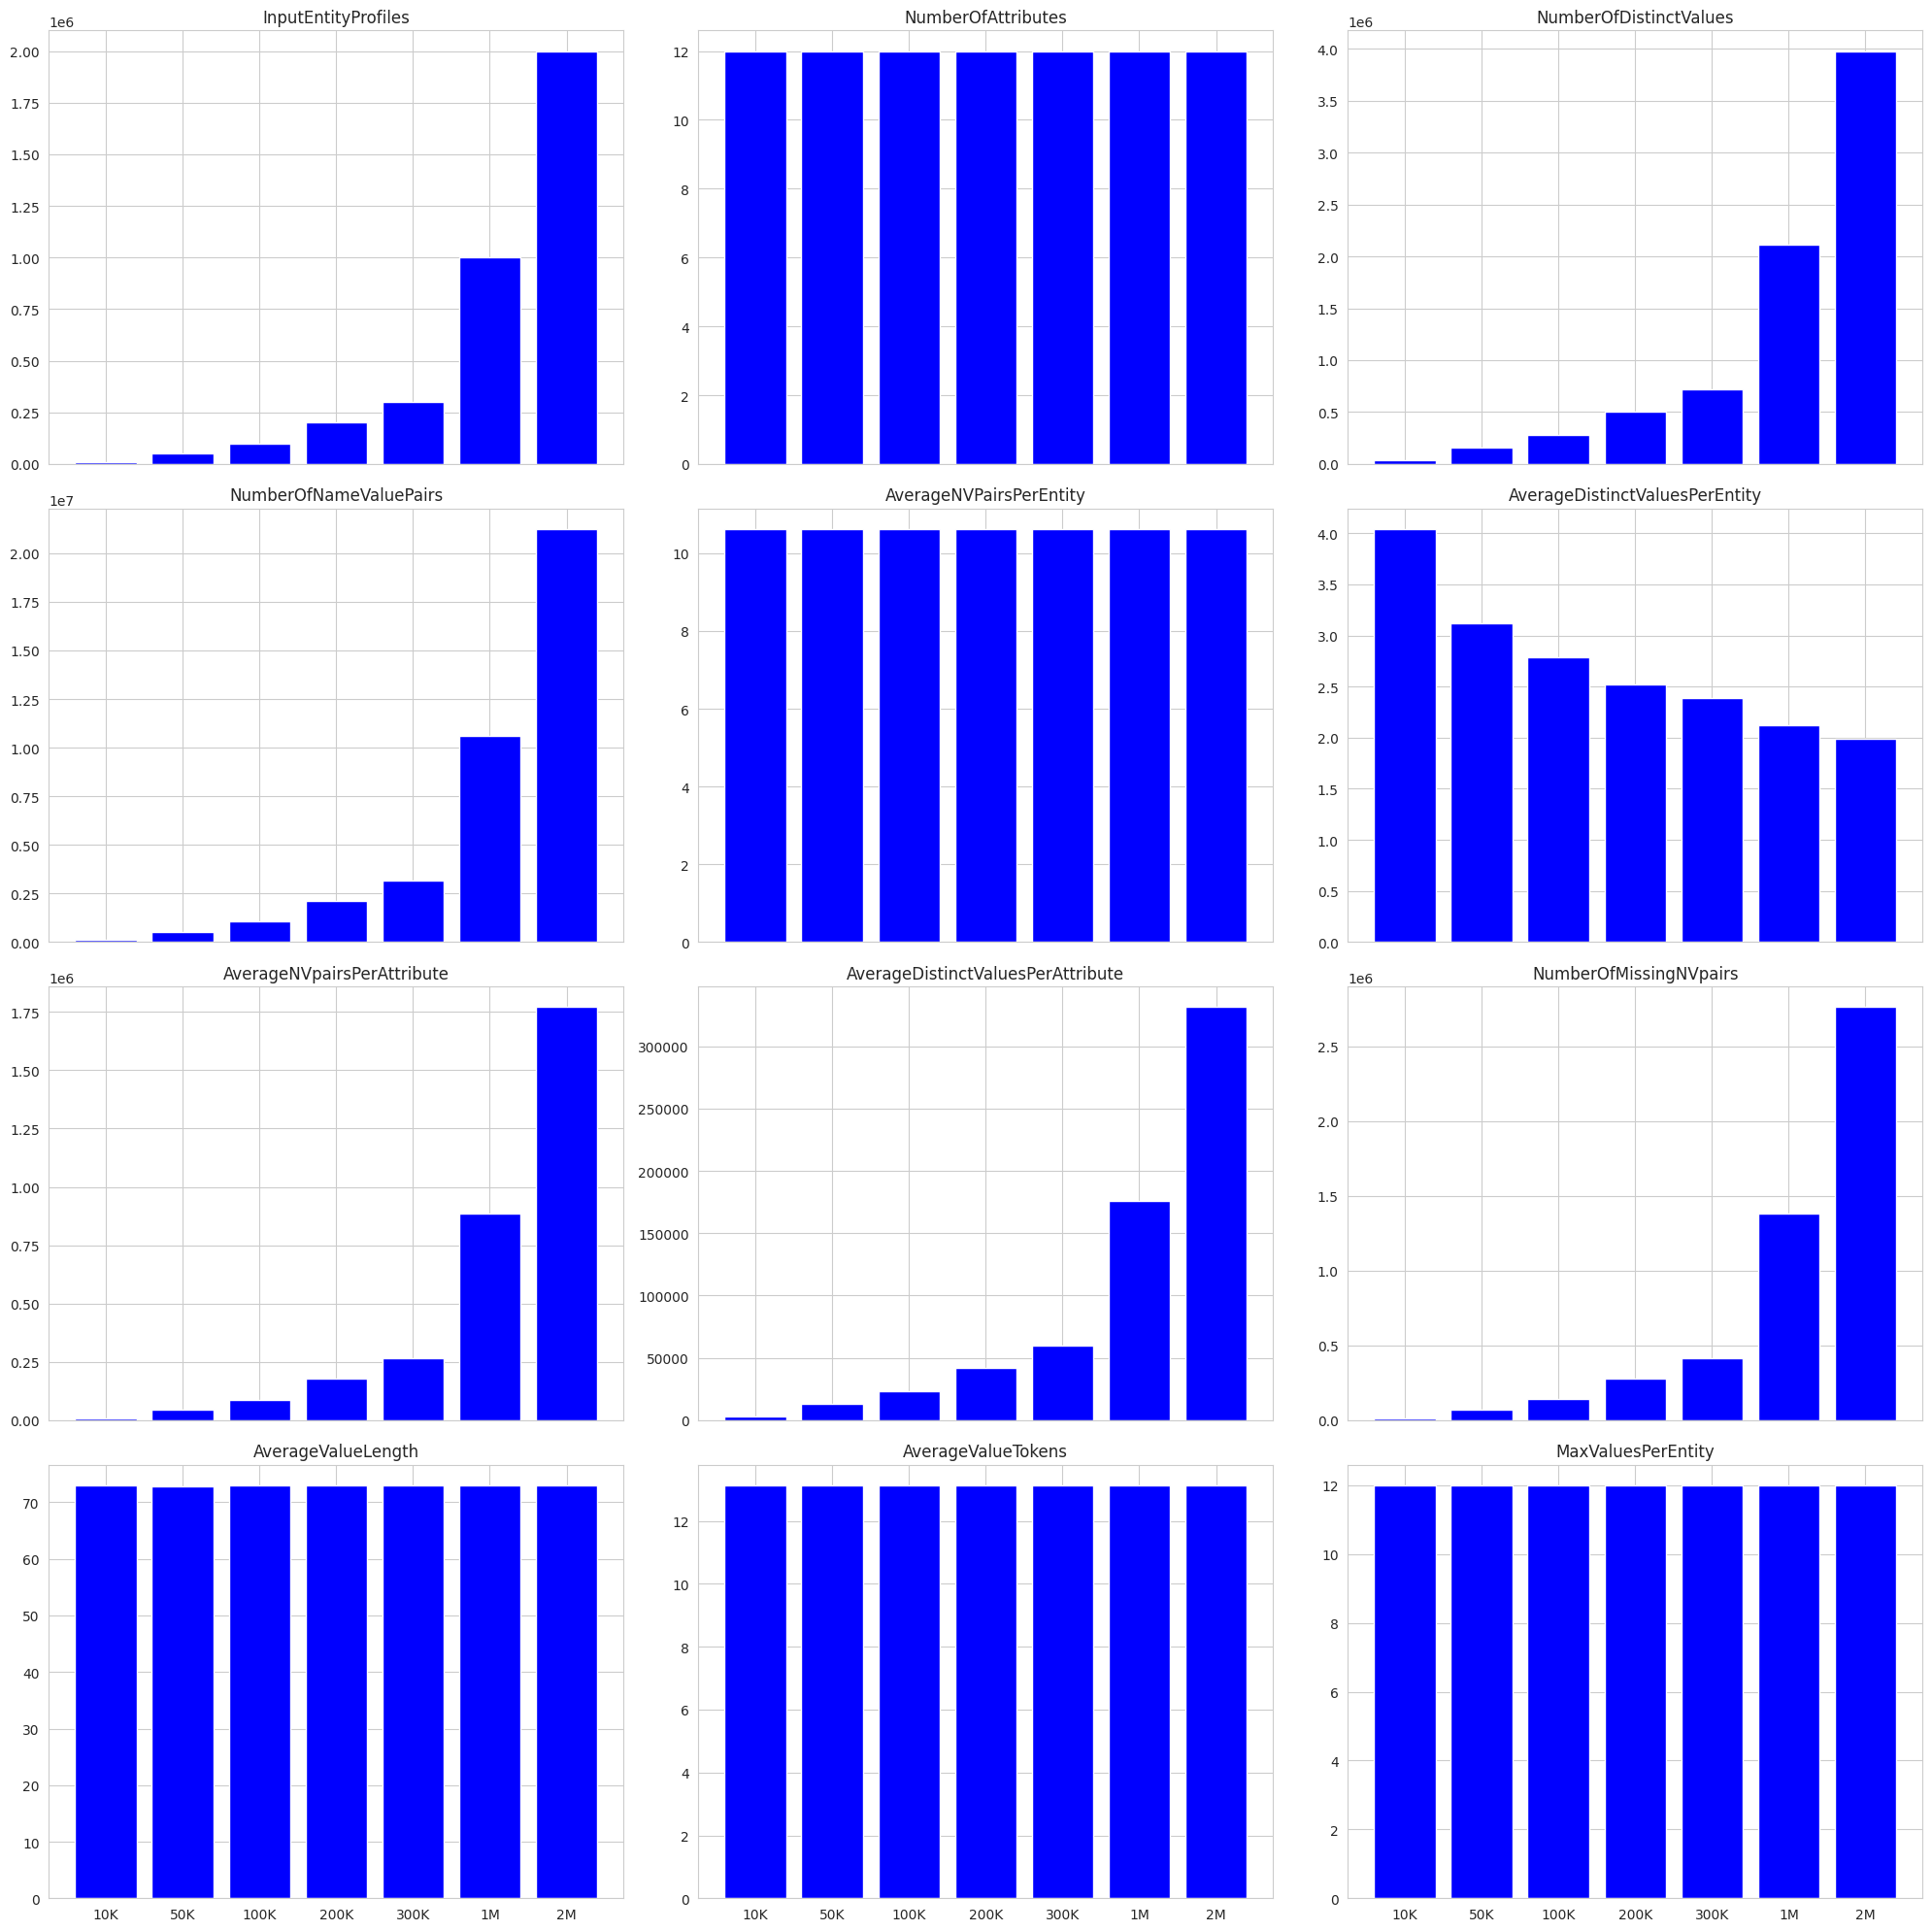

In [128]:
data = SyntheticDatasetsFeatures
columns_to_plot = [
    'InputEntityProfiles', 'NumberOfAttributes', 'NumberOfDistinctValues',
    'NumberOfNameValuePairs', 'AverageNVPairsPerEntity', 'AverageDistinctValuesPerEntity',
    'AverageNVpairsPerAttribute', 'AverageDistinctValuesPerAttribute',
    'NumberOfMissingNVpairs', 'AverageValueLength', 'AverageValueTokens', 'MaxValuesPerEntity'
]
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20), sharex=True)

axes = axes.flatten()

for ax, column in zip(axes, columns_to_plot):
    ax.bar(data['dataset'], data[column], color='blue')
    ax.set_title(f'{column}')
    # ax.set_xlabel('Dataset')
    # ax.set_ylabel(column)
    ax.set_xticks(range(len(data['dataset'])))
    ax.set_xticklabels(data['dataset'])

for ax in axes[len(columns_to_plot):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.savefig(FIGURES_DIR + 'census_dataset_specs.png')
plt.show()

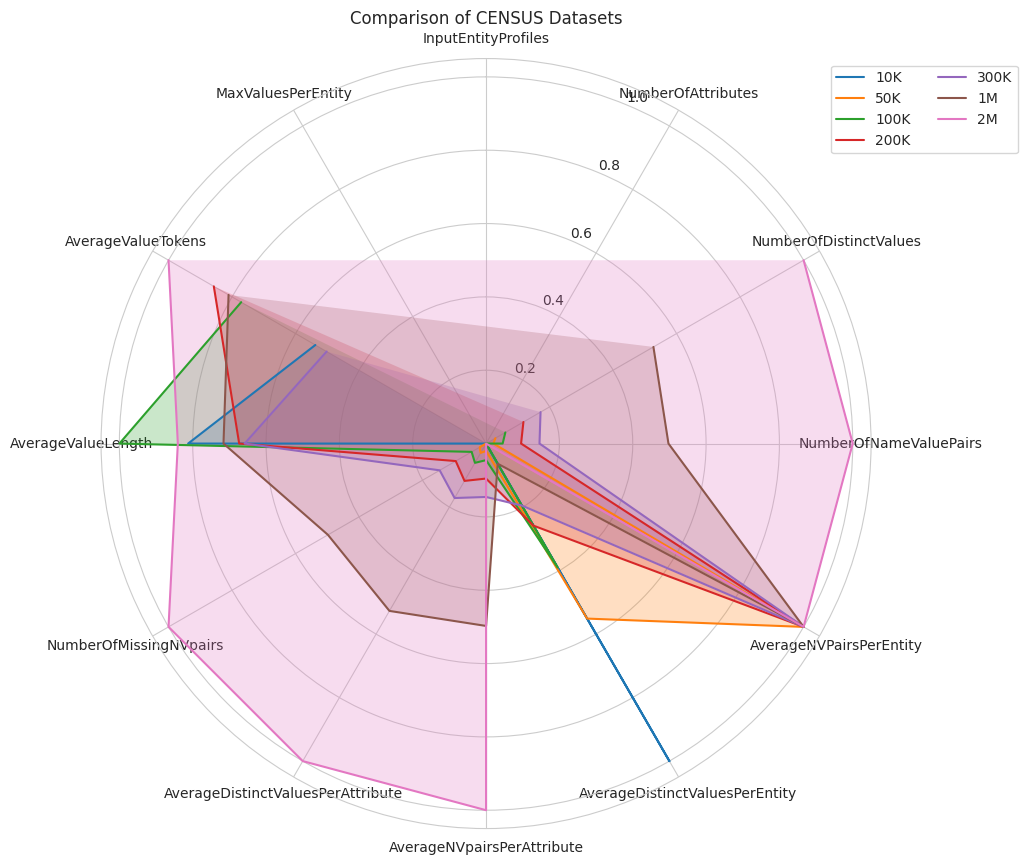

In [126]:
import numpy as np
data = SyntheticDatasetsFeatures
data_normalized = data.copy()
for column in columns_to_plot:
    data_normalized[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

def create_radar_chart(data, labels, title):
    num_vars = len(labels)
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], labels)
    ax.set_rscale('linear')
    
    for idx, row in data.iterrows():
        values = row[columns_to_plot].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['dataset'])
        ax.fill(angles, values, alpha=0.25)
    
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncols=2)
    plt.savefig(FIGURES_DIR + 'census_dataset_specs_radar.png')
    plt.show()

create_radar_chart(data_normalized, columns_to_plot, 'Comparison of CENSUS Datasets')

# 1st case: **WITH GROUND-TRUTH**


## Optuna Visualizations

Contains 4 databases:
- autoconf_gridsearch.db
- autoconf_random.db
- autoconf_tpe.db
- autoconf_qmc.db

In [9]:
import optuna
db_name = 'autoconf_qmc.db'
storage_name = f'sqlite:////home/konstantinos/pyJedAI-AutoConfiguration/with_gt/dbs/{db_name}'  # Replace with your storage name
study_summaries = optuna.study.get_all_study_summaries(storage=storage_name)
study_names = [summary.study_name for summary in study_summaries]
print(study_names)

/home/conda/miniconda3/envs/autoconf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['D1_5_16', 'D1_10_16', 'D1_15_16', 'D1_20_16', 'D1_25_16', 'D1_30_16', 'D1_35_16', 'D1_40_16', 'D1_45_16', 'D1_50_16', 'D1_5_64', 'D1_10_64', 'D1_15_64', 'D1_20_64', 'D1_25_64', 'D1_30_64', 'D1_35_64', 'D1_40_64', 'D1_45_64', 'D1_50_64', 'D1_5_256', 'D1_10_256', 'D1_15_256', 'D1_20_256', 'D1_25_256', 'D1_30_256', 'D1_35_256', 'D1_40_256', 'D1_45_256', 'D1_50_256', 'D1_5_1024', 'D1_10_1024', 'D1_15_1024', 'D1_20_1024', 'D1_25_1024', 'D1_30_1024', 'D1_35_1024', 'D1_40_1024', 'D1_45_1024', 'D1_50_1024', 'D1_5_4096', 'D1_10_4096', 'D1_15_4096', 'D1_20_4096', 'D1_25_4096', 'D1_30_4096', 'D1_35_4096', 'D1_40_4096', 'D1_45_4096', 'D1_50_4096', 'D2_5_16', 'D2_10_16', 'D2_15_16', 'D2_20_16', 'D2_25_16', 'D2_30_16', 'D2_35_16', 'D2_40_16', 'D2_45_16', 'D2_50_16', 'D2_5_64', 'D2_10_64', 'D2_15_64', 'D2_20_64', 'D2_25_64', 'D2_30_64', 'D2_35_64', 'D2_40_64', 'D2_45_64', 'D2_50_64', 'D2_5_256', 'D2_10_256', 'D2_15_256', 'D2_20_256', 'D2_25_256', 'D2_30_256', 'D2_35_256', 'D2_40_256', 'D2_45_256', 

In [10]:
db_name = 'autoconf_gridsearch.db'
storage_name = f'sqlite:////home/konstantinos/pyJedAI-AutoConfiguration/with_gt/dbs/{db_name}'  # Replace with your storage name
study_summaries = optuna.study.get_all_study_summaries(storage=storage_name)
study_names = [summary.study_name for summary in study_summaries]
print(study_names)

['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']


In [11]:
study_name = study_names[0]
study = optuna.load_study(study_name=study_name, storage=storage_name)

df = study.trials_dataframe()
df

number    value             datetime_start          datetime_complete  \
0          0   0.0000 2024-04-24 13:59:42.042743 2024-04-24 13:59:42.904460   
1          1  55.5911 2024-04-24 13:59:42.926633 2024-04-24 13:59:43.022563   
2          2  41.1215 2024-04-24 13:59:43.041807 2024-04-24 13:59:43.729457   
3          3  70.0000 2024-04-24 13:59:43.769670 2024-04-24 13:59:43.875353   
4          4  51.6129 2024-04-24 13:59:43.894124 2024-04-24 13:59:44.035168   
...      ...      ...                        ...                        ...   
8905    8905  53.6585 2024-04-24 18:15:00.023109 2024-04-24 18:15:02.963336   
8906    8906  68.4211 2024-04-24 18:15:03.041777 2024-04-24 18:15:05.339442   
8907    8907  44.9848 2024-04-24 18:15:05.401755 2024-04-24 18:15:07.619582   
8908    8908  41.4458 2024-04-24 18:15:07.683798 2024-04-24 18:15:10.397372   
8909    8909  53.6913 2024-04-24 18:15:10.476057 2024-04-24 18:15:13.043659   

                   duration              params_clustering  params_k  \
0    0 days 00:00:00.861717  ConnectedComponentsClustering         5   
1    0 days 00:00:00.095930            BestMatchClustering         5   
2    0 days 00:00:00.687650            BestMatchClustering        85   
3    0 days 00:00:00.105683  ConnectedComponentsClustering         5   
4    0 days 00:00:00.141044        UniqueMappingClustering         7   
...                     ...                            ...       ...   
8905 0 days 00:00:02.940227        UniqueMappingClustering        75   
8906 0 days 00:00:02.297665  ConnectedComponentsClustering        21   
8907 0 days 00:00:02.217827            BestMatchClustering         4   
8908 0 days 00:00:02.713574        UniqueMappingClustering        30   
8909 0 days 00:00:02.567602            BestMatchClustering        23   

       params_lm  params_threshold     state  
0        sminilm              0.40  COMPLETE  
1        sminilm              0.75  COMPLETE  
2        sminilm              0.05  COMPLETE  
3        sminilm              0.80  COMPLETE  
4        sminilm              0.45  COMPLETE  
...          ...               ...       ...  
8905     sminilm              0.60  COMPLETE  
8906  sent_glove              0.85  COMPLETE  
8907  sent_glove              0.50  COMPLETE  
8908      smpnet              0.20  COMPLETE  
8909     sminilm              0.80  COMPLETE  

[8910 rows x 10 columns]

In [12]:
import plotly.graph_objects as go
custom_layout = go.Layout(
    font=dict(family="Arial, sans-serif", size=12, color="#4d4d4d"),
    title=dict(font=dict(size=20, color='#333')),
    paper_bgcolor='white',
    plot_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridcolor='#ebebeb',
        gridwidth=1,
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='#ebebeb'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='#ebebeb',
        gridwidth=1,
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='#ebebeb'
    )
)

In [13]:
fig = optuna.visualization.plot_optimization_history(study)
fig.update_layout(custom_layout)
fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"optimization_history.png", width=1200, height=800)
fig.show()

In [14]:
# fig = optuna.visualization.plot_parallel_coordinate(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_parallel_coordinate.png")
# fig.show()

In [15]:
# fig = optuna.visualization.plot_contour(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_contour.png")
# fig.show()

In [16]:
# fig = optuna.visualization.plot_param_importances(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_param_importances.png", width=1200, height=800)
# fig.show()

In [17]:
# fig = optuna.visualization.plot_edf(study)
# fig.update_layout(custom_layout)
# fig.write_image(FIGURES_DIR+db_name+'_'+ study_name+'_'+"plot_edf.png", width=1200, height=800)
# fig.show()

## All trials (All samplers + all seeds + gridsearch concatenated)

In [18]:
all_trials = pd.read_csv('./with_gt/results/trials.csv')
all_trials_processed = pd.read_csv('./with_gt/results/trials_processed.csv')
all_trials

trial dataset                      clustering              lm   k  \
0           0      D4   ConnectedComponentsClustering  sdistilroberta  23   
1           1      D4         UniqueMappingClustering             st5   1   
2           2      D4   ConnectedComponentsClustering             st5  51   
3           3      D4   ConnectedComponentsClustering          smpnet  75   
4           4      D4         UniqueMappingClustering         sminilm  25   
...       ...     ...                             ...             ...  ..   
130345   8905      D5  KiralyMSMApproximateClustering         sminilm  86   
130346   8906      D5             BestMatchClustering      sent_glove  41   
130347   8907      D5   ConnectedComponentsClustering  sdistilroberta  30   
130348   8908      D5   ConnectedComponentsClustering         sminilm  84   
130349   8909      D5  KiralyMSMApproximateClustering  sdistilroberta  91   

        threshold     sampler  seed  precision   recall       f1   runtime  
0        0.557313         qmc    16   100.0000   4.8112   9.1806  0.758500  
1        0.050000         qmc    16    98.7794  98.2464  98.5122  0.391800  
2        0.500000         qmc    16     0.0000   0.0000   0.0000  0.795400  
3        0.275000         qmc    16     0.0000   0.0000   0.0000  1.009000  
4        0.725000         qmc    16    97.9100  96.8975  97.4011  0.491500  
...           ...         ...   ...        ...      ...      ...       ...  
130345   0.100000  gridsearch    42    58.0952  86.7886  69.6007  6.032823  
130346   0.350000  gridsearch    42    21.9088  42.2256  28.8492  2.586984  
130347   0.600000  gridsearch    42    77.9172  31.5549  44.9186  2.703562  
130348   0.850000  gridsearch    42    90.0875  15.7012  26.7417  3.940058  
130349   0.800000  gridsearch    42    85.3061  10.6199  18.8884  3.254573  

[130350 rows x 12 columns]

In [19]:
all_trials.describe()

trial              k      threshold           seed  \
count  130350.000000  130350.000000  130350.000000  130350.000000   
mean     3050.227848      50.236578       0.485392     374.025316   
std      2963.393287      28.518306       0.259495     996.973638   
min         0.000000       1.000000       0.050000      16.000000   
25%        28.000000      25.000000       0.250000      42.000000   
50%      2392.000000      50.000000       0.500000      42.000000   
75%      5651.000000      75.000000       0.700000      64.000000   
max      8909.000000     100.000000       0.949883    4096.000000   

           precision         recall             f1        runtime  
count  130350.000000  130350.000000  130350.000000  130350.000000  
mean       51.769822      50.671653      43.034023       5.218241  
std        31.835929      34.118306      29.350243       7.289713  
min         0.000000       0.000000       0.000000       0.044500  
25%        25.958700      17.806100      19.927500       1.185244  
50%        52.675400      57.164600      42.409600       2.157566  
75%        82.511900      82.283100      63.895500       5.830350  
max       100.000000      98.876400      98.512200      72.010000

How many trials per approach?

RandomSampler [optuna]:  13750
QMCSampler [optuna]:  13750
TPESampler [optuna]:  13750
Gridsearch [gridsearch]:  89100
After pre-processing and deduplication [all]:  115640


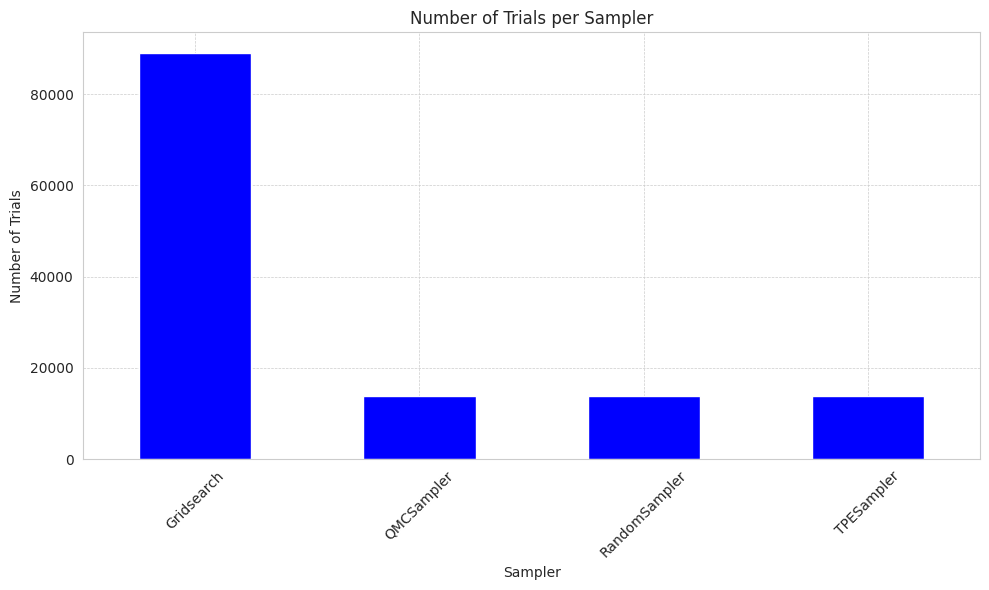

In [129]:
trial_counts = all_trials.groupby('sampler')['trial'].count()

print('RandomSampler [optuna]: ', trial_counts['random'])
print('QMCSampler [optuna]: ', trial_counts['qmc'])
print('TPESampler [optuna]: ', trial_counts['tpe'])
print('Gridsearch [gridsearch]: ', trial_counts['gridsearch'])
print('After pre-processing and deduplication [all]: ', all_trials_processed.shape[0])

trial_counts.plot(kind='bar', color='blue', figsize=(10, 6))

plt.xticks(range(len(trial_counts)), ['Gridsearch','QMCSampler','RandomSampler','TPESampler'], rotation=45)
plt.title('Number of Trials per Sampler')
plt.xlabel('Sampler')
plt.ylabel('Number of Trials')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()  # Adjust layout to make room for label
plt.show()

## Convergence diagrams

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapezoid

import seaborn as sns

sns.set_style("whitegrid")

suffix = './with_gt/results/'
dirs = ['qmc', 'tpe', 'random']
methods = ['QMCSampler', 'TPESampler', 'RandomSampler']
palette = sns.color_palette("viridis", n_colors=len(methods))  # Define color palette

data = {f'D{i}': {method: None for method in methods} for i in range(1, 11)}

for method, directory in zip(methods, dirs):
    for i in range(1, 11):
        batches = [i for i in range(5, 50 + 5, 5)]
        df = pd.read_csv(f'{suffix}{directory}/D{i}.csv')
        df['initial_index'] = df.index
        max_trials = []
        seed = df['seed'].iloc[0]
        sampler = df['sampler'].iloc[0]
        for row in df.iterrows():
            row = row[1]
            prev_seed = seed
            prev_sampler = sampler
            seed = row['seed']
            sampler =  row['sampler']
            if seed != prev_seed or sampler != prev_sampler:
                batches = [i for i in range(5, 50 + 5, 5)]
            trials_id = row['trial']
            max_trials.append(batches[0])
            if trials_id == batches[0] - 1:
                batches.pop(0)
        df['max_trials'] = max_trials
        data[f'D{i}'][method] = df.sort_values(by=['initial_index'])

#### F1

/tmp/ipykernel_3321675/1269706519.py:25: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



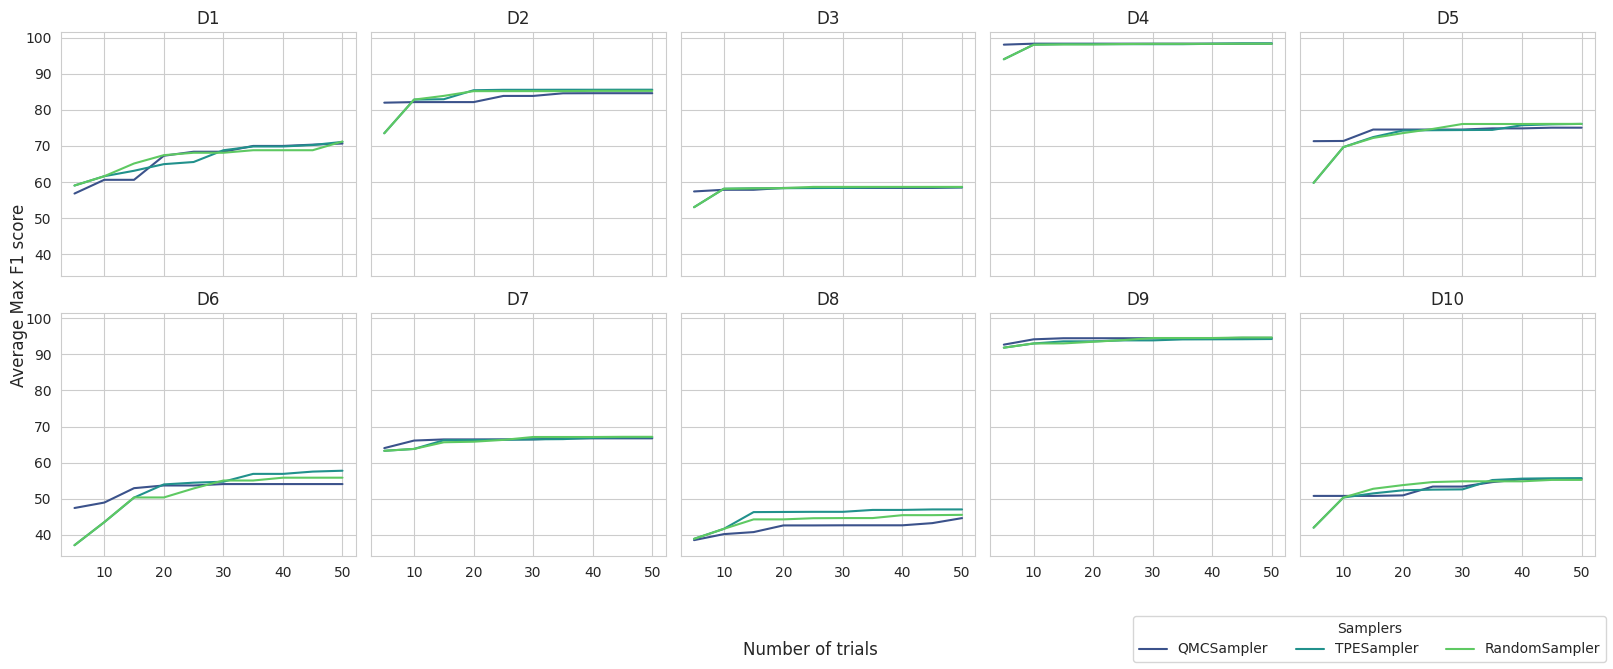

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)
axes = axes.flatten()

def plot_convergence(ax, dataset_name, dataset_data, auc_df, methods):
    for idx, method in enumerate(methods):
        df = dataset_data[method]
        max_f1_per_seed_trial = df.groupby(['max_trials', 'seed'])['f1'].max().reset_index()      
        avg_max_f1_per_trial = max_f1_per_seed_trial.groupby('max_trials')['f1'].mean().reset_index()
        x = avg_max_f1_per_trial['max_trials'].values
        y = avg_max_f1_per_trial['f1'].values

        area_trapz = trapezoid(y, x)  
        max_x = max(x) if x.size > 0 else 0
        max_y = 100 
        square_area = max_x * max_y
        normalized_auc = area_trapz / square_area if square_area > 0 else 0

        new_row = pd.DataFrame({
            'dataset': [dataset_name],
            'sampler': [method],
            'auc': [normalized_auc],
            'runtime': [df['runtime'].sum()] 
        })

        auc_df = pd.concat([auc_df, new_row], ignore_index=True)
        sns.lineplot(ax=ax, x='max_trials', y='f1', data=avg_max_f1_per_trial, label=method, color=palette[idx], legend=None)

    ax.set_title(f'{dataset_name}')
    ax.grid(True)

    return auc_df

auc_df = pd.DataFrame(columns=['dataset', 'sampler', 'auc', 'runtime'])
for i in range(1, 11):
    dataset_name = f'D{i}'
    ax = axes[i-1]
    auc_df = plot_convergence(ax, dataset_name, data[dataset_name], auc_df, methods)
    ax.set_xlabel('')
    ax.set_ylabel('')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', ncol=3, title="Samplers")
fig.text(0.5, -0.1, 'Number of trials', ha='center', fontsize=12)
fig.text(-0.00, 0.5, 'Average Max F1 score', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.savefig('./figures/f1_convergence_plots.png')
plt.show()

#### Runtime

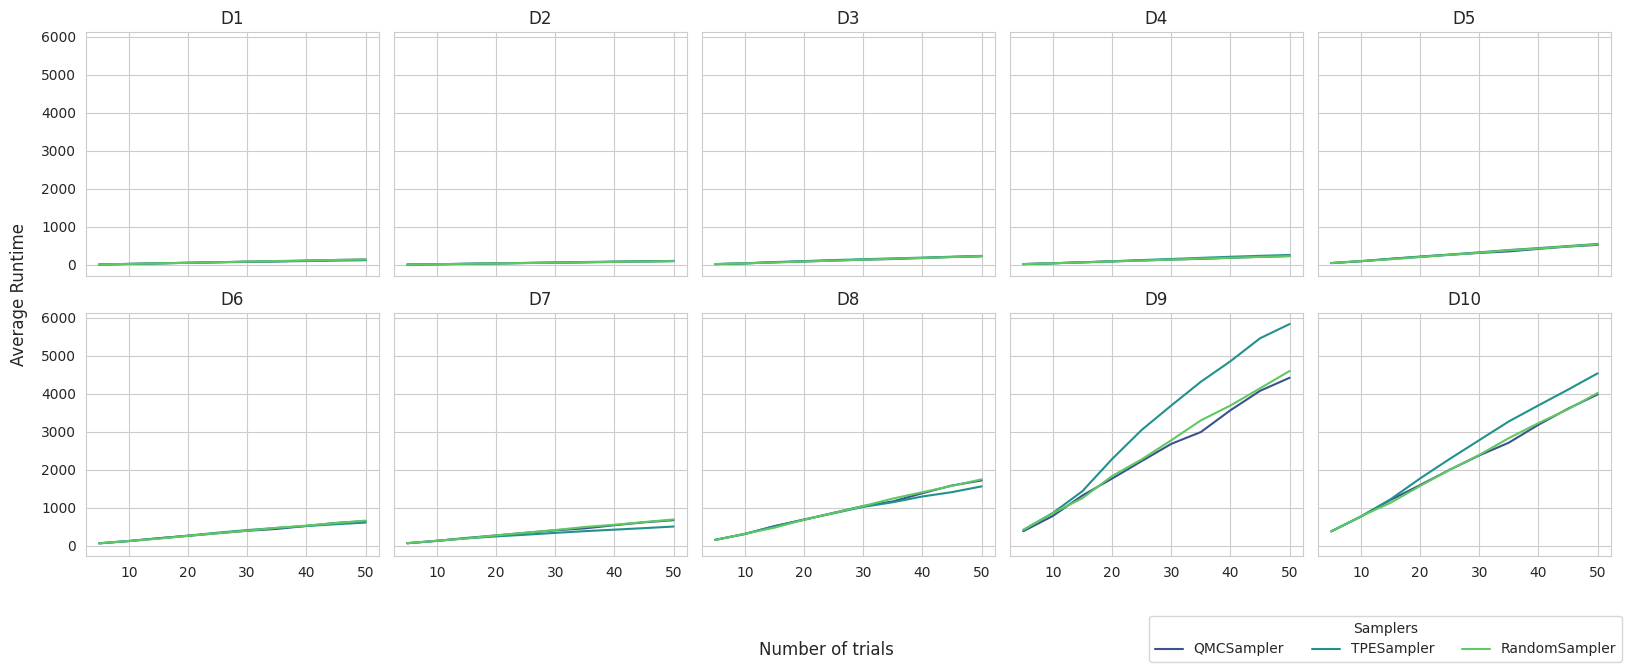

In [23]:
fig, axes = plt.subplots(2, 5, figsize=(16, 6), sharex=True, sharey=True)
axes = axes.flatten()

def plot_convergence(ax, dataset_name, dataset_data):
    for idx, method in enumerate(methods):
        df = dataset_data[method]
        avg_runtime_per_seed_trial = df.groupby(['max_trials'])['runtime'].sum().reset_index() 
        sns.lineplot(ax=ax, x='max_trials', y='runtime', data=avg_runtime_per_seed_trial, label=method, color=palette[idx], legend=None)
    ax.set_title(f'{dataset_name}')
    ax.grid(True)

for i in range(1, 11):
    dataset_name = f'D{i}'
    ax = axes[i-1]
    plot_convergence(ax, dataset_name, data[dataset_name])
    ax.set_xlabel('')
    ax.set_ylabel('')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', ncol=3, title="Samplers")
fig.text(0.5, -0.1, 'Number of trials', ha='center', fontsize=12)
fig.text(-0.01, 0.5, 'Average Runtime', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.savefig('./figures/runtime_convergence_plots.png')
plt.show()

### AUC diagrams

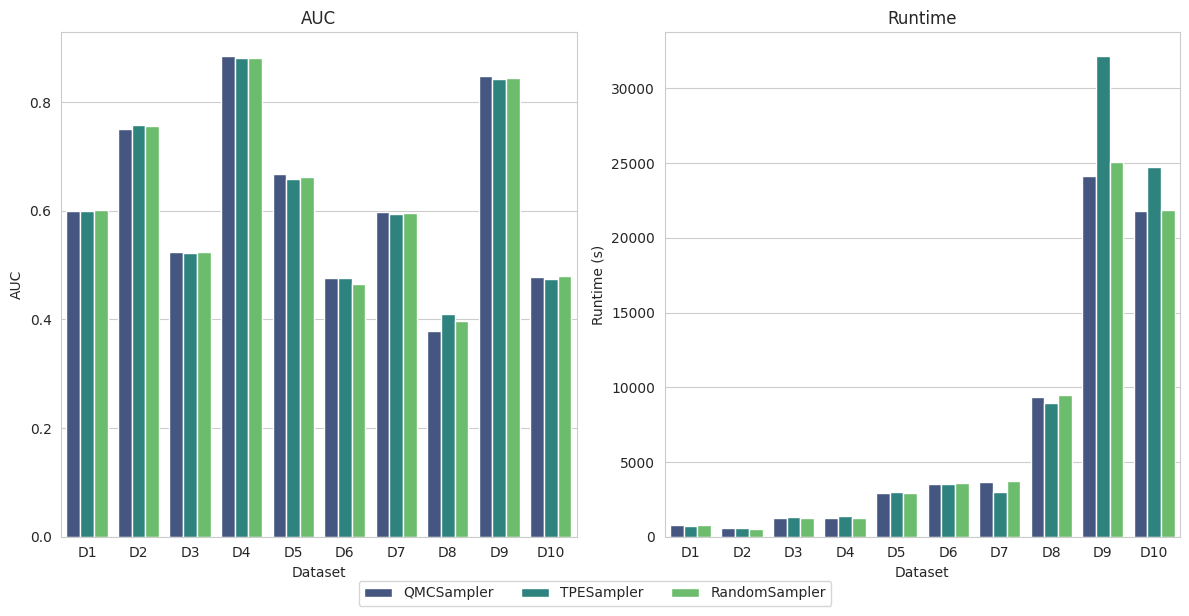

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df = auc_df
methods = df['sampler'].unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
palette = sns.color_palette("viridis", n_colors=len(methods))

sns.barplot(ax=axes[0], x='dataset', y='auc', hue='sampler', data=df, palette=palette)
axes[0].set_title('AUC')
axes[0].set_ylabel('AUC')
axes[0].get_legend().remove()

sns.barplot(ax=axes[1], x='dataset', y='runtime', hue='sampler', data=df, palette=palette)
axes[1].set_title('Runtime')
axes[1].set_ylabel('Runtime (s)')
axes[1].get_legend().remove()

for ax in axes:
    ax.set_xlabel('Dataset')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(methods), bbox_to_anchor=(0.5, -0.03))
plt.tight_layout()
plt.savefig('./figures/auc.png')
plt.show()

# 2nd case: **NO GROUND-TRUTH**

## Auto-sklearn {all, grideasrch, optuna}

In [25]:
automl_all = pd.read_csv('./without_gt/automl/all.csv')
automl_all

TEST_SET    AUTOML_REGRESSOR   TEST_MSE   PREDICTED_F1   GLOBAL_BEST_F1  \
0       D1   gradient_boosting   415.3952        56.7742          77.0833   
1       D2   gradient_boosting   658.1883        33.5968          85.8486   
2       D3   gradient_boosting   301.4862        58.5045          59.0871   
3       D4   gradient_boosting  1758.9965        97.5303          98.5122   
4       D5   gradient_boosting   478.0292        75.8014          78.2517   
5       D6   gradient_boosting   291.7079        35.4722          60.2534   
6       D7   gradient_boosting   322.9631        57.5722          67.7308   
7       D8   gradient_boosting  2778.2472        38.0861          48.5417   
8       D9   gradient_boosting  2363.7483        94.3686          94.9211   
9      D10   gradient_boosting  1059.0330         5.6337          56.1170   

    PERFORMANCE   PREDICTIONS_RUNTIME   OPTIMIZATION_TIME  
0        0.7365                0.6691          10795.3808  
1        0.3913                0.6157          10797.1253  
2        0.9901                0.5711          10834.6047  
3        0.9900                0.6532          10798.6785  
4        0.9687                0.6253          10805.1743  
5        0.5887                0.6762          10985.6344  
6        0.8500                0.6023          10802.9346  
7        0.7846                0.5973          10807.6687  
8        0.9942                0.6171          10853.7492  
9        0.1004                0.5540          10810.9654

## Sklearn {all, gridsearch, optuna}: LASSO, LINEAR, RF, SVR, XGB, RIDGE

In [26]:
sklearn_all_XGB = pd.read_csv('./without_gt/sklearn/all_XGB.csv')
sklearn_all_XGB

TEST_SET  DATASET      REGRESSOR   VALIDATION_MSE   TEST_MSE   PREDICTED_F1  \
0       D1      all   XGBRegressor           0.2640   442.2653        55.0162   
1       D2      all   XGBRegressor           0.5122   237.6102        79.6794   
2       D3      all   XGBRegressor           0.2457  2026.0817        57.7169   
3       D4      all   XGBRegressor           0.4715  2220.4551        96.4509   
4       D5      all   XGBRegressor           0.4126   394.0092        65.3543   
5       D6      all   XGBRegressor           0.4642   384.7415        35.4722   
6       D7      all   XGBRegressor           0.3746   365.5678        57.5722   
7       D8      all   XGBRegressor           0.4797  1544.2115        40.2027   
8       D9      all   XGBRegressor           0.5380  2960.7003        94.3887   
9      D10      all   XGBRegressor           0.4555   518.0612         0.8015   

    GLOBAL_BEST_F1   PERFORMANCE   OPTIMIZATION_TIME  \
0          77.0833        0.7137            232.6130   
1          85.8486        0.9281            139.6991   
2          59.0871        0.9768            226.4318   
3          98.5122        0.9791            139.8374   
4          78.2517        0.8352            191.1683   
5          60.2534        0.5887            137.8122   
6          67.7308        0.8500            161.0117   
7          48.5417        0.8282            149.0204   
8          94.9211        0.9944            142.1424   
9          56.1170        0.0143            161.3775   

    BEST_REGRESSOR_FIT_TIME   BEST_REGRESSOR_PREDICTION_TIME  
0                    9.1742                           0.0537  
1                    1.1852                           0.0134  
2                    8.8827                           0.0465  
3                    1.2593                           0.0135  
4                    4.8464                           0.0293  
5                    1.3092                           0.0144  
6                    4.0472                           0.0263  
7                    2.1606                           0.0176  
8                    1.3884                           0.0151  
9                    4.1153                           0.0263

### Optuna dashboards

In [27]:
import optuna
db_name = 'all_LASSO.db'
storage_name = f'sqlite:////home/konstantinos/pyJedAI-AutoConfiguration/without_gt/sklearn/dbs/{db_name}'  # Replace with your storage name
study_summaries = optuna.study.get_all_study_summaries(storage=storage_name)
study_names = [summary.study_name for summary in study_summaries]
print(study_names)
study_name = study_names[0]
study = optuna.load_study(study_name=study_name, storage=storage_name)
df = study.trials_dataframe()
df

['all_LASSO_D1', 'all_LASSO_D2', 'all_LASSO_D3', 'all_LASSO_D4', 'all_LASSO_D5', 'all_LASSO_D6', 'all_LASSO_D7', 'all_LASSO_D8', 'all_LASSO_D9', 'all_LASSO_D10']


number       value             datetime_start          datetime_complete  \
0        0  238.692123 2024-05-24 18:49:12.688652 2024-05-24 18:49:14.383375   
1        1  639.287050 2024-05-24 18:49:14.442111 2024-05-24 18:49:14.541160   
2        2  414.135595 2024-05-24 18:49:14.633031 2024-05-24 18:49:15.333266   
3        3  254.834296 2024-05-24 18:49:15.390358 2024-05-24 18:49:16.665637   
4        4  238.280373 2024-05-24 18:49:16.741310 2024-05-24 18:49:18.160885   
5        5  238.280365 2024-05-24 18:49:18.224518 2024-05-24 18:49:19.586488   
6        6  238.260368 2024-05-24 18:49:19.670918 2024-05-24 18:49:20.985212   
7        7  507.095812 2024-05-24 18:49:21.063342 2024-05-24 18:49:21.239772   
8        8  255.836929 2024-05-24 18:49:21.298242 2024-05-24 18:49:22.572384   
9        9  351.404406 2024-05-24 18:49:22.635588 2024-05-24 18:49:23.725886   
10      10  238.257053 2024-05-24 18:49:23.788125 2024-05-24 18:49:25.138510   
11      11  238.255871 2024-05-24 18:49:25.218151 2024-05-24 18:49:26.532318   
12      12  238.484928 2024-05-24 18:49:26.590917 2024-05-24 18:49:28.118056   
13      13  238.256066 2024-05-24 18:49:28.195351 2024-05-24 18:49:29.615517   
14      14  238.459291 2024-05-24 18:49:29.681808 2024-05-24 18:49:31.062419   
15      15  238.287207 2024-05-24 18:49:31.147178 2024-05-24 18:49:32.506125   
16      16  238.256232 2024-05-24 18:49:32.599326 2024-05-24 18:49:33.966899   
17      17  238.329945 2024-05-24 18:49:34.057644 2024-05-24 18:49:35.501617   
18      18  239.158781 2024-05-24 18:49:35.592170 2024-05-24 18:49:37.028349   
19      19  238.271559 2024-05-24 18:49:37.105435 2024-05-24 18:49:38.549513   
20      20  239.289835 2024-05-24 18:49:38.596114 2024-05-24 18:49:39.982666   
21      21  238.255976 2024-05-24 18:49:40.057450 2024-05-24 18:49:41.470838   
22      22  238.262055 2024-05-24 18:49:41.544978 2024-05-24 18:49:43.031402   
23      23  238.343376 2024-05-24 18:49:43.097430 2024-05-24 18:49:44.448516   
24      24  238.265020 2024-05-24 18:49:44.527287 2024-05-24 18:49:45.879415   
25      25  238.328904 2024-05-24 18:49:45.968456 2024-05-24 18:49:47.330104   
26      26  238.256028 2024-05-24 18:49:47.418736 2024-05-24 18:49:48.792353   
27      27  238.296945 2024-05-24 18:49:48.876858 2024-05-24 18:49:50.237955   
28      28  238.264422 2024-05-24 18:49:50.319109 2024-05-24 18:49:51.695527   
29      29  238.779484 2024-05-24 18:49:51.767100 2024-05-24 18:49:53.124935   
30      30  238.433646 2024-05-24 18:49:53.215854 2024-05-24 18:49:54.627050   
31      31  238.256025 2024-05-24 18:49:54.703431 2024-05-24 18:49:56.102492   
32      32  238.259885 2024-05-24 18:49:56.175492 2024-05-24 18:49:57.514935   
33      33  238.268761 2024-05-24 18:49:57.606249 2024-05-24 18:49:58.917310   
34      34  238.256341 2024-05-24 18:49:59.007707 2024-05-24 18:50:00.317872   
35      35  238.302068 2024-05-24 18:50:00.368710 2024-05-24 18:50:01.713071   
36      36  238.272493 2024-05-24 18:50:01.803167 2024-05-24 18:50:03.140586   
37      37  759.726660 2024-05-24 18:50:03.234177 2024-05-24 18:50:03.370644   
38      38  238.259624 2024-05-24 18:50:03.459427 2024-05-24 18:50:04.873992   
39      39  238.279801 2024-05-24 18:50:04.978549 2024-05-24 18:50:06.272111   
40      40  504.477072 2024-05-24 18:50:06.351801 2024-05-24 18:50:06.499230   
41      41  238.255845 2024-05-24 18:50:06.597250 2024-05-24 18:50:07.852448   
42      42  238.259654 2024-05-24 18:50:07.923165 2024-05-24 18:50:09.244965   
43      43  238.264576 2024-05-24 18:50:09.321440 2024-05-24 18:50:10.646051   
44      44  238.258468 2024-05-24 18:50:10.727174 2024-05-24 18:50:12.021326   
45      45  284.476578 2024-05-24 18:50:12.095455 2024-05-24 18:50:13.170144   
46      46  238.255890 2024-05-24 18:50:13.246809 2024-05-24 18:50:14.485407   
47      47  238.274514 2024-05-24 18:50:14.577961 2024-05-24 18:50:15.777678   
48      48  238.264334 2024-05-24 18:50:15.854405 2024-05-24 18:50:17.090010   
49  

## DL

In [28]:
dl_all = pd.read_csv('./without_gt/dl/all.csv')
dl_all

TEST_SET  DATASET  REGRESSOR   VALIDATION_MSE   TEST_MSE   PREDICTED_F1  \
0       D1      all         NN           3.5546   559.8974        14.5455   
1       D2      all         NN           4.2257   587.7918        77.6235   
2       D3      all         NN           2.9716   877.6594        52.3403   
3       D4      all         NN           2.1439  2457.9427        98.3769   
4       D5      all         NN           2.8746   483.8856        67.5626   
5       D6      all         NN           2.9920   956.6033        38.9905   
6       D7      all         NN           3.4710   392.5667        62.2824   
7       D8      all         NN           3.8445  2506.5493        40.1214   
8       D9      all         NN           2.9069  4081.7026        92.3308   
9      D10      all         NN           3.2138   796.1835         0.8535   

    GLOBAL_BEST_F1   PERFORMANCE   OPTIMIZATION_TIME  \
0          77.0833        0.1887           5831.1358   
1          85.8486        0.9042           4921.6546   
2          59.0871        0.8858           5416.2184   
3          98.5122        0.9986           5010.3508   
4          78.2517        0.8634           5957.7343   
5          60.2534        0.6471           6118.4568   
6          67.7308        0.9196           5938.5255   
7          48.5417        0.8265           4775.6928   
8          94.9211        0.9727           4871.7982   
9          56.1170        0.0152           6170.8320   

    BEST_REGRESSOR_FIT_TIME   BEST_REGRESSOR_PREDICTION_TIME  
0                  173.8231                           0.1299  
1                  156.5384                           0.1328  
2                  113.2550                           0.1339  
3                  108.6056                           0.1338  
4                  168.6554                           0.1326  
5                  167.2805                           0.1346  
6                  170.0799                           0.1326  
7                  102.4130                           0.1321  
8                  163.2741                           0.1311  
9                  168.9231                           0.1310

### Optuna dashboards

In [29]:
import optuna
db_name = 'all.db'
storage_name = f'sqlite:////home/konstantinos/pyJedAI-AutoConfiguration/without_gt/dl/dbs/{db_name}'  # Replace with your storage name
study_summaries = optuna.study.get_all_study_summaries(storage=storage_name)
study_names = [summary.study_name for summary in study_summaries]
print(study_names)
study_name = study_names[0]
study = optuna.load_study(study_name=study_name, storage=storage_name)
df = study.trials_dataframe()
df

['all_D1', 'all_D2', 'all_D3', 'all_D4', 'all_D5', 'all_D6', 'all_D7', 'all_D8', 'all_D9', 'all_D10']


number       value             datetime_start          datetime_complete  \
0        0   13.402839 2024-05-20 15:26:51.214113 2024-05-20 15:28:47.634733   
1        1  120.629184 2024-05-20 15:28:47.659897 2024-05-20 15:29:18.484297   
2        2   43.391186 2024-05-20 15:29:18.505761 2024-05-20 15:30:40.212157   
3        3   57.503663 2024-05-20 15:30:40.246569 2024-05-20 15:33:26.262039   
4        4   55.362805 2024-05-20 15:33:26.283602 2024-05-20 15:33:59.951581   
5        5   36.157542 2024-05-20 15:33:59.972437 2024-05-20 15:35:31.331341   
6        6   17.512812 2024-05-20 15:35:31.352744 2024-05-20 15:37:16.930582   
7        7   55.414161 2024-05-20 15:37:16.952160 2024-05-20 15:38:21.764518   
8        8   11.031170 2024-05-20 15:38:21.776087 2024-05-20 15:38:59.380639   
9        9   17.056832 2024-05-20 15:38:59.409999 2024-05-20 15:39:13.043609   
10      10    6.134657 2024-05-20 15:39:13.065436 2024-05-20 15:40:10.920514   
11      11    5.402098 2024-05-20 15:40:10.942360 2024-05-20 15:41:12.254088   
12      12    4.539704 2024-05-20 15:41:12.265337 2024-05-20 15:42:13.676011   
13      13    5.179966 2024-05-20 15:42:13.698375 2024-05-20 15:43:21.600712   
14      14    5.637141 2024-05-20 15:43:21.632866 2024-05-20 15:44:36.348489   
15      15    3.557307 2024-05-20 15:44:36.369713 2024-05-20 15:46:48.562951   
16      16    5.748432 2024-05-20 15:46:48.585183 2024-05-20 15:49:10.908524   
17      17    5.020361 2024-05-20 15:49:10.940708 2024-05-20 15:51:27.195412   
18      18   14.323293 2024-05-20 15:51:27.206411 2024-05-20 15:53:19.772852   
19      19    4.879366 2024-05-20 15:53:19.794151 2024-05-20 15:56:04.060276   
20      20    9.455792 2024-05-20 15:56:04.080982 2024-05-20 15:57:29.753078   
21      21    4.717787 2024-05-20 15:57:29.773932 2024-05-20 16:00:21.212960   
22      22    3.662657 2024-05-20 16:00:21.244591 2024-05-20 16:02:55.509531   
23      23    4.845550 2024-05-20 16:02:55.530604 2024-05-20 16:05:20.985815   
24      24    3.657064 2024-05-20 16:05:21.019660 2024-05-20 16:07:54.901864   
25      25    5.140706 2024-05-20 16:07:54.923633 2024-05-20 16:10:01.649079   
26      26    7.154952 2024-05-20 16:10:01.671320 2024-05-20 16:12:35.520479   
27      27    4.328874 2024-05-20 16:12:35.553381 2024-05-20 16:14:45.031063   
28      28    6.145110 2024-05-20 16:14:45.065915 2024-05-20 16:16:56.708888   
29      29    5.793621 2024-05-20 16:16:56.730132 2024-05-20 16:18:55.317798   
30      30   15.699413 2024-05-20 16:18:55.329156 2024-05-20 16:21:02.132096   
31      31    7.046411 2024-05-20 16:21:02.153256 2024-05-20 16:22:20.694876   
32      32    4.035619 2024-05-20 16:22:20.728298 2024-05-20 16:24:47.989560   
33      33    4.359074 2024-05-20 16:24:48.010463 2024-05-20 16:27:17.626350   
34      34    4.985812 2024-05-20 16:27:17.648606 2024-05-20 16:29:53.974596   
35      35    4.503937 2024-05-20 16:29:53.995634 2024-05-20 16:32:17.009831   
36      36   35.887341 2024-05-20 16:32:17.035793 2024-05-20 16:35:13.416039   
37      37    6.747787 2024-05-20 16:35:13.441194 2024-05-20 16:36:56.156269   
38      38    7.064382 2024-05-20 16:36:56.167853 2024-05-20 16:38:34.710185   
39      39    6.123875 2024-05-20 16:38:34.751354 2024-05-20 16:41:20.481397   
40      40   11.095540 2024-05-20 16:41:20.507683 2024-05-20 16:43:09.000789   
41      41    5.340634 2024-05-20 16:43:09.025248 2024-05-20 16:45:17.493845   
42      42    4.819378 2024-05-20 16:45:17.539512 2024-05-20 16:47:27.467195   
43      43    4.266314 2024-05-20 16:47:27.500403 2024-05-20 16:49:48.259015   
44      44    4.674399 2024-05-20 16:49:48.296631 2024-05-20 16:52:12.090828   
45      45    3.554627 2024-05-20 16:52:12.127709 2024-05-20 16:54:54.588757   
46      46   52.636078 2024-05-20 16:54:54.625114 2024-05-20 16:57:38.435987   
47      47    6.616223 2024-05-20 16:57:38.477626 2024-05-20 17:00:17.036709   
48      48    7.330915 2024-05-20 17:00:17.061390 2024-05-20 17:03:07.088191   
49  

## **Concatenated** - Performance comparison

In [30]:
import pandas as pd
import warnings

palette = sns.color_palette("viridis", n_colors=3)
warnings.filterwarnings("ignore", category=FutureWarning)

file_path = './without_gt/autoconf_final_results.csv'
autoconf_final_results = pd.read_csv(file_path)
def categorize_regressor(regressor):
    if regressor in ['automl_extra_trees', 'automl_gradient_boosting']:
        return 'AutoSKLEARN'
    elif regressor == 'NN':
        return 'DL'
    elif regressor in ['XGBRegressor', 'Ridge', 'LinearRegression', 'RandomForestRegressor', 'SVR', 'Lasso']:
        return 'SKLEARN'
    else:
        return 'Other'

autoconf_final_results['EXPERIMENT'] = autoconf_final_results['REGRESSOR'].apply(categorize_regressor)
dataset_index = autoconf_final_results.columns.get_loc('DATASET') + 1
autoconf_final_results = autoconf_final_results.reindex(columns=autoconf_final_results.columns.tolist()[:dataset_index] + ['EXPERIMENT'] + autoconf_final_results.columns.tolist()[dataset_index:-1])

autoconf_final_results

TEST_SET DATASET   EXPERIMENT                 REGRESSOR  VALIDATION_MSE  \
0         D1  optuna  AutoSKLEARN        automl_extra_trees             NaN   
1         D2  optuna  AutoSKLEARN        automl_extra_trees             NaN   
2         D3  optuna  AutoSKLEARN        automl_extra_trees             NaN   
3         D4  optuna  AutoSKLEARN  automl_gradient_boosting             NaN   
4         D5  optuna  AutoSKLEARN        automl_extra_trees             NaN   
..       ...     ...          ...                       ...             ...   
225       D6  optuna      SKLEARN                     Lasso        238.7744   
226       D7  optuna      SKLEARN                     Lasso        225.3521   
227       D8  optuna      SKLEARN                     Lasso        277.2687   
228       D9  optuna      SKLEARN                     Lasso        248.5365   
229      D10  optuna      SKLEARN                     Lasso        212.6853   

         TEST_MSE  PREDICTED_F1  GLOBAL_BEST_F1  PERFORMANCE  \
0    2.682213e+02       54.4892         77.0833       0.7069   
1    4.249515e+02       81.9401         85.8486       0.9545   
2    2.128962e+02       57.1667         59.0871       0.9675   
3    2.515989e+03       97.4893         98.5122       0.9896   
4    3.388932e+02       77.3673         78.2517       0.9887   
..            ...           ...             ...          ...   
225  9.121479e+02       41.0042         60.2534       0.6805   
226  5.128939e+02       45.4102         67.7308       0.6705   
227  4.820751e+03       40.1214         48.5417       0.8265   
228  2.024721e+04       92.8452         94.9211       0.9781   
229  1.597947e+08        2.1458         56.1170       0.0382   

     OPTIMIZATION_TIME  BEST_REGRESSOR_FIT_TIME  \
0           10807.2639                      NaN   
1           10832.9714                      NaN   
2           10850.2284                      NaN   
3           10824.1753                      NaN   
4           10871.2538                      NaN   
..                 ...                      ...   
225            54.6350                   1.0541   
226            52.9127                   1.2227   
227            56.0223                   1.1378   
228            49.7149                   1.0061   
229            54.9723                   1.1869   

     BEST_REGRESSOR_PREDICTION_TIME  
0                            0.2555  
1                            0.2806  
2                            0.4240  
3                            0.2889  
4                            0.3917  
..                              ...  
225                          0.0057  
226                          0.0138  
227                          0.0056  
228                          0.0056  
229                          0.0137  

[230 rows x 12 columns]

In [150]:
dataset_colors = {'gridsearch': 'blue', 'optuna': 'orange', 'all': 'red', 'Best F1': 'gold'}
palette = [dataset_colors[name] for name in ['gridsearch', 'optuna', 'all', 'Best F1']]
dataset_order = ['gridsearch', 'optuna', 'all', 'Best F1']
# Prepare color palette
palette = {'gridsearch': 'blue', 'optuna': 'orange', 'all': 'red', 'Best F1': 'gold'}

### Plots for Auto-sklearn

/tmp/ipykernel_3321675/727702105.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



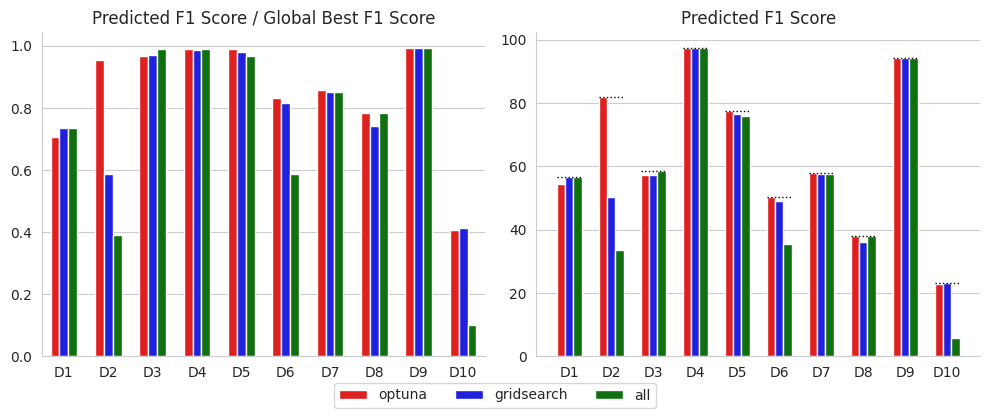

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = autoconf_final_results
filtered_data = data[(data['EXPERIMENT'] == 'AutoSKLEARN') & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], categories=test_set_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

metrics = ['PERFORMANCE', 'PREDICTED_F1']
metric_labels = {
    'PERFORMANCE': 'Predicted F1 Score / Global Best F1 Score',
    'PREDICTED_F1': 'Predicted F1 Score'
}

# Prepare color palette
palette = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green'}

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(ax=ax, data=filtered_data, x='TEST_SET', y=metric, hue='DATASET',
                width=0.6, order=test_set_order, palette=palette)
    ax.set_title(metric_labels[metric])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x')

    # Remove frame on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if metric == 'PREDICTED_F1':
        # Compute maximum values for each TEST_SET
        max_values = filtered_data.groupby('TEST_SET')[metric].max()
        
        # Draw horizontal lines for max values
        for j, test_set in enumerate(test_set_order):
            max_value = max_values[test_set]
            # Adjust the position to center the line over the bars (this might need tweaking)
            line_position = j - 0.3  # slight shift left to center the line
            ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.6, colors='black', linestyles=':', lw=1, alpha=1)

for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()
plt.savefig('./figures/autosklearn_f1.png')
plt.show()


/tmp/ipykernel_3321675/270303552.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



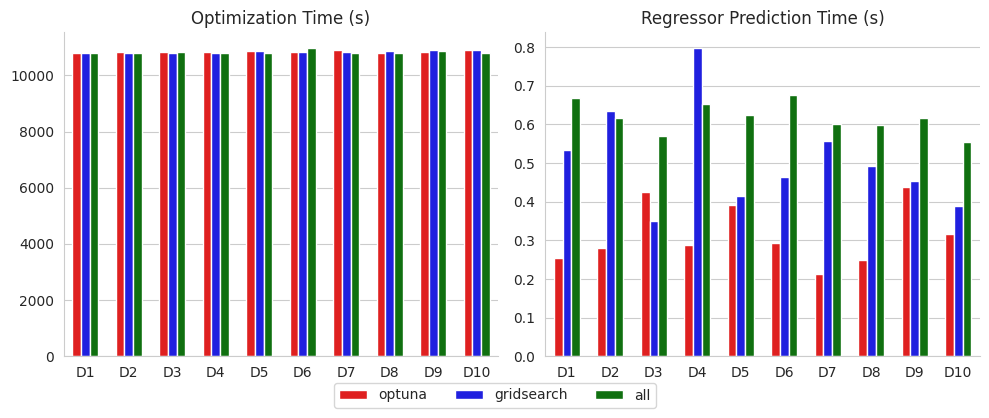

In [163]:
data=autoconf_final_results
filtered_data = data[(data['EXPERIMENT'] == 'AutoSKLEARN') & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], categories=test_set_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

metrics = ['OPTIMIZATION_TIME', 'BEST_REGRESSOR_PREDICTION_TIME']
metric_labels = {
    'OPTIMIZATION_TIME': 'Optimization Time (s)',
    'BEST_REGRESSOR_PREDICTION_TIME': 'Regressor Prediction Time (s)'
}



for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(ax=ax, data=filtered_data, x='TEST_SET', y=metric, hue='DATASET',
                width=0.6, order=test_set_order, palette=palette)
    ax.set_title(metric_labels[metric])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x')

    # Remove frame on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if metric == 'PREDICTED_F1':
        # Compute maximum values for each TEST_SET
        max_values = filtered_data.groupby('TEST_SET')[metric].max()
        
        # Draw horizontal lines for max values
        for j, test_set in enumerate(test_set_order):
            max_value = max_values[test_set]
            # Adjust the position to center the line over the bars (this might need tweaking)
            line_position = j - 0.3  # slight shift left to center the line
            ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.6, colors='black', linestyles=':', lw=1, alpha=1)

for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()
plt.savefig('./figures/autosklearn_runtimes.png')
plt.show()

Best reults for each dataset using AutoSKLEARN approach.

In [164]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]
max_f1_rows

TEST_SET     DATASET   EXPERIMENT                 REGRESSOR  \
10       D1  gridsearch  AutoSKLEARN  automl_gradient_boosting   
1        D2      optuna  AutoSKLEARN        automl_extra_trees   
22       D3         all  AutoSKLEARN  automl_gradient_boosting   
23       D4         all  AutoSKLEARN  automl_gradient_boosting   
4        D5      optuna  AutoSKLEARN        automl_extra_trees   
5        D6      optuna  AutoSKLEARN        automl_extra_trees   
6        D7      optuna  AutoSKLEARN  automl_gradient_boosting   
7        D8      optuna  AutoSKLEARN        automl_extra_trees   
28       D9         all  AutoSKLEARN  automl_gradient_boosting   
19      D10  gridsearch  AutoSKLEARN  automl_gradient_boosting   

    VALIDATION_MSE   TEST_MSE  PREDICTED_F1  GLOBAL_BEST_F1  PERFORMANCE  \
10             NaN   517.8951       56.7742         77.0833       0.7365   
1              NaN   424.9515       81.9401         85.8486       0.9545   
22             NaN   301.4862       58.5045         59.0871       0.9901   
23             NaN  1758.9965       97.5303         98.5122       0.9900   
4              NaN   338.8932       77.3673         78.2517       0.9887   
5              NaN   428.8079       50.2077         60.2534       0.8333   
6              NaN   292.0679       58.0684         67.7308       0.8573   
7              NaN  1064.9043       38.0861         48.5417       0.7846   
28             NaN  2363.7483       94.3686         94.9211       0.9942   
19             NaN  1104.6460       23.2299         56.1170       0.4140   

    OPTIMIZATION_TIME  BEST_REGRESSOR_FIT_TIME  BEST_REGRESSOR_PREDICTION_TIME  
10         10808.9914                      NaN                          0.5339  
1          10832.9714                      NaN                          0.2806  
22         10834.6047                      NaN                          0.5711  
23         10798.6785                      NaN                          0.6532  
4          10871.2538                      NaN                          0.3917  
5          10843.3462                      NaN                          0.2923  
6          10911.3914                      NaN                          0.2123  
7          10809.4946                      NaN                          0.2484  
28         10853.7492                      NaN                          0.6171  
19         10895.4942                      NaN                          0.3897

In [165]:
best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1']

# Apply string formatting to keep two decimals
for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:  # Check if the column is of object type, typically used for strings in pandas
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & gridsearch &  gradient boosting & 56.77 & 77.083300 & 0.736500 \\
D2 & optuna &  extra trees & 81.94 & 85.848600 & 0.954500 \\
D3 & all &  gradient boosting & 58.50 & 59.087100 & 0.990100 \\
D4 & all &  gradient boosting & 97.53 & 98.512200 & 0.990000 \\
D5 & optuna &  extra trees & 77.37 & 78.251700 & 0.988700 \\
D6 & optuna &  extra trees & 50.21 & 60.253400 & 0.833300 \\
D7 & optuna &  gradient boosting & 58.07 & 67.730800 & 0.857300 \\
D8 & optuna &  extra trees & 38.09 & 48.541700 & 0.784600 \\
D9 & all &  gradient boosting & 94.37 & 94.921100 & 0.994200 \\
D10 & gridsearch &  gradient boosting & 23.23 & 56.117000 & 0.414000 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3321675/3226024007.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3321675/3226024007.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3321675/3226024007.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Plots for Sklearn

I have removed SVR since it has not run for all trials.

In [166]:
filtered_data

TEST_SET     DATASET   EXPERIMENT                 REGRESSOR  \
0        D1      optuna  AutoSKLEARN        automl_extra_trees   
1        D2      optuna  AutoSKLEARN        automl_extra_trees   
2        D3      optuna  AutoSKLEARN        automl_extra_trees   
3        D4      optuna  AutoSKLEARN  automl_gradient_boosting   
4        D5      optuna  AutoSKLEARN        automl_extra_trees   
5        D6      optuna  AutoSKLEARN        automl_extra_trees   
6        D7      optuna  AutoSKLEARN  automl_gradient_boosting   
7        D8      optuna  AutoSKLEARN        automl_extra_trees   
8        D9      optuna  AutoSKLEARN        automl_extra_trees   
9       D10      optuna  AutoSKLEARN  automl_gradient_boosting   
10       D1  gridsearch  AutoSKLEARN  automl_gradient_boosting   
11       D2  gridsearch  AutoSKLEARN  automl_gradient_boosting   
12       D3  gridsearch  AutoSKLEARN  automl_gradient_boosting   
13       D4  gridsearch  AutoSKLEARN  automl_gradient_boosting   
14       D5  gridsearch  AutoSKLEARN  automl_gradient_boosting   
15       D6  gridsearch  AutoSKLEARN  automl_gradient_boosting   
16       D7  gridsearch  AutoSKLEARN  automl_gradient_boosting   
17       D8  gridsearch  AutoSKLEARN  automl_gradient_boosting   
18       D9  gridsearch  AutoSKLEARN  automl_gradient_boosting   
19      D10  gridsearch  AutoSKLEARN  automl_gradient_boosting   
20       D1         all  AutoSKLEARN  automl_gradient_boosting   
21       D2         all  AutoSKLEARN  automl_gradient_boosting   
22       D3         all  AutoSKLEARN  automl_gradient_boosting   
23       D4         all  AutoSKLEARN  automl_gradient_boosting   
24       D5         all  AutoSKLEARN  automl_gradient_boosting   
25       D6         all  AutoSKLEARN  automl_gradient_boosting   
26       D7         all  AutoSKLEARN  automl_gradient_boosting   
27       D8         all  AutoSKLEARN  automl_gradient_boosting   
28       D9         all  AutoSKLEARN  automl_gradient_boosting   
29      D10         all  AutoSKLEARN  automl_gradient_boosting   

    VALIDATION_MSE   TEST_MSE  PREDICTED_F1  GLOBAL_BEST_F1  PERFORMANCE  \
0              NaN   268.2213       54.4892         77.0833       0.7069   
1              NaN   424.9515       81.9401         85.8486       0.9545   
2              NaN   212.8962       57.1667         59.0871       0.9675   
3              NaN  2515.9887       97.4893         98.5122       0.9896   
4              NaN   338.8932       77.3673         78.2517       0.9887   
5              NaN   428.8079       50.2077         60.2534       0.8333   
6              NaN   292.0679       58.0684         67.7308       0.8573   
7              NaN  1064.9043       38.0861         48.5417       0.7846   
8              NaN  2009.4840       94.3284         94.9211       0.9938   
9              NaN   931.6515       22.8577         56.1170       0.4073   
10             NaN   517.8951       56.7742         77.0833       0.7365   
11             NaN   634.6196       50.3754         85.8486       0.5868   
12             NaN   318.2718       57.3535         59.0871       0.9707   
13             NaN  1613.1384       97.2937         98.5122       0.9876   
14             NaN   449.7290       76.6224         78.2517       0.9792   
15             NaN   208.3133       49.1400         60.2534       0.8156   
16             NaN   256.2994       57.5722         67.7308       0.8500   
17             NaN  2615.4057       36.0092         48.5417       0.7418   
18             NaN  2578.2474       94.3485         94.9211       0.9940   
19             NaN  1104.6460       23.2299         56.1170       0.4140   
20             NaN   415.3952       56.7742         77.0833       0.7365   
21             NaN   658.1883       33.5968         85.8486       0.3913   
22             NaN   301.4862       58.5045         59.0871       0.9901   
23             NaN  1758.9965       97.5303         98.5122       0.9900   
24             NaN   478.0292       75.8014         78.2

/tmp/ipykernel_3321675/392662533.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



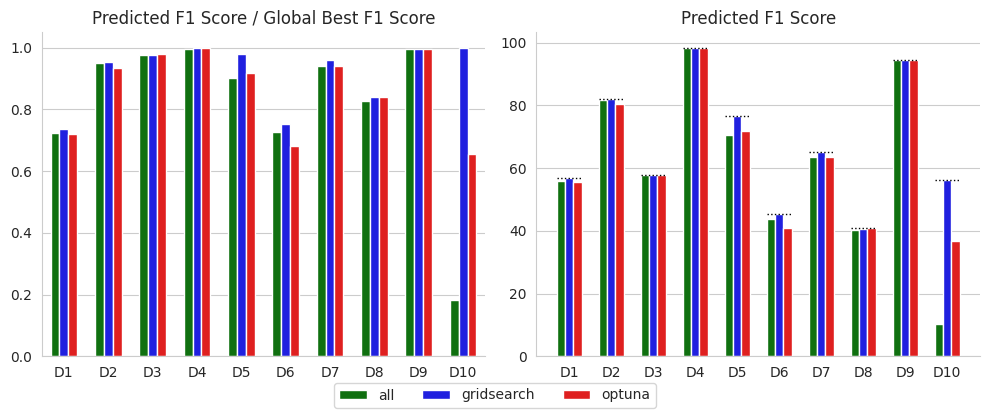

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = autoconf_final_results
metrics = ['PERFORMANCE', 'PREDICTED_F1', 'OPTIMIZATION_TIME', 'BEST_REGRESSOR_FIT_TIME']
filtered_data = data[(data['EXPERIMENT'] == 'SKLEARN') & (data['REGRESSOR'] != 'SVR') &  (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], categories=test_set_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

metrics = ['PERFORMANCE', 'PREDICTED_F1']
metric_labels = {
    'PERFORMANCE': 'Predicted F1 Score / Global Best F1 Score',
    'PREDICTED_F1': 'Predicted F1 Score'
}

# Prepare color palette
palette = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green'}

for i, metric in enumerate(metrics):
    ax = axes[i]

    temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].max().reset_index()

    sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                width=0.6, order=test_set_order, palette=palette)
    ax.set_title(metric_labels[metric])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x')

    # Remove frame on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if metric == 'PREDICTED_F1':
        # Compute maximum values for each TEST_SET
        max_values = temp_data.groupby('TEST_SET')[metric].max()
        
        # Draw horizontal lines for max values
        for j, test_set in enumerate(test_set_order):
            max_value = max_values[test_set]
            # Adjust the position to center the line over the bars (this might need tweaking)
            line_position = j - 0.3  # slight shift left to center the line
            ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.6, colors='black', linestyles=':', lw=1, alpha=1)

for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()
plt.savefig('./figures/sklearn_f1.png')
plt.show()


/tmp/ipykernel_3321675/1585424310.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



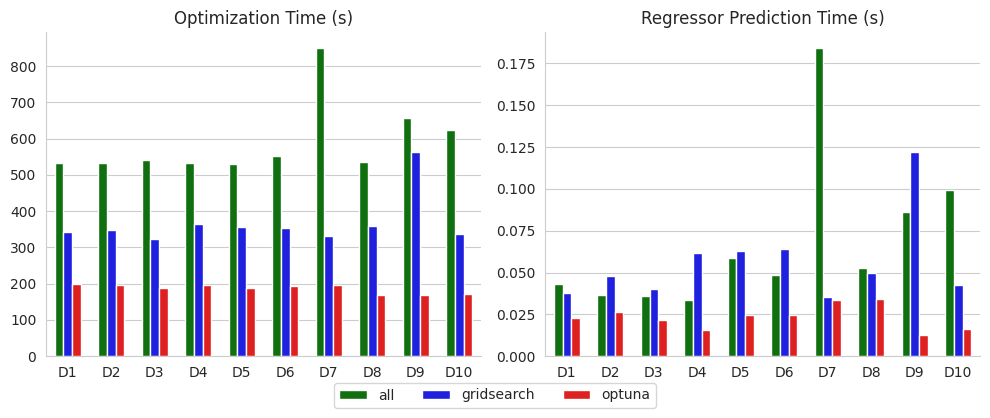

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = autoconf_final_results
metrics = ['PERFORMANCE', 'PREDICTED_F1', 'OPTIMIZATION_TIME', 'BEST_REGRESSOR_FIT_TIME']
filtered_data = data[(data['EXPERIMENT'] == 'SKLEARN') & (data['REGRESSOR'] != 'SVR') &  (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], categories=test_set_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

metrics = ['OPTIMIZATION_TIME', 'BEST_REGRESSOR_PREDICTION_TIME']
metric_labels = {
    'OPTIMIZATION_TIME': 'Optimization Time (s)',
    'BEST_REGRESSOR_PREDICTION_TIME': 'Regressor Prediction Time (s)'
}

# Prepare color palette
palette = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green'}

for i, metric in enumerate(metrics):
    ax = axes[i]

    temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].mean().reset_index()

    sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                width=0.6, order=test_set_order, palette=palette)
    ax.set_title(metric_labels[metric])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x')

    # Remove frame on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if metric == 'PREDICTED_F1':
        # Compute maximum values for each TEST_SET
        max_values = temp_data.groupby('TEST_SET')[metric].max()
        
        # Draw horizontal lines for max values
        for j, test_set in enumerate(test_set_order):
            max_value = max_values[test_set]
            # Adjust the position to center the line over the bars (this might need tweaking)
            line_position = j - 0.3  # slight shift left to center the line
            ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.6, colors='black', linestyles=':', lw=1, alpha=1)

for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()
plt.savefig('./figures/sklearn_runtime.png')
plt.show()


Best reults for each dataset using SKLEARN approach.

In [169]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]
max_f1_rows

TEST_SET     DATASET EXPERIMENT              REGRESSOR  VALIDATION_MSE  \
60        D1  gridsearch    SKLEARN           XGBRegressor          0.2391   
61        D2  gridsearch    SKLEARN           XGBRegressor          0.0789   
182       D3      optuna    SKLEARN           XGBRegressor          0.3958   
73        D4      optuna    SKLEARN                  Ridge        216.1008   
104       D5  gridsearch    SKLEARN  RandomForestRegressor          9.5737   
105       D6  gridsearch    SKLEARN  RandomForestRegressor         15.0667   
106       D7  gridsearch    SKLEARN  RandomForestRegressor         10.5038   
197       D8      optuna    SKLEARN  RandomForestRegressor         32.6015   
108       D9  gridsearch    SKLEARN  RandomForestRegressor         19.8755   
209      D10  gridsearch    SKLEARN       LinearRegression        230.9267   

         TEST_MSE  PREDICTED_F1  GLOBAL_BEST_F1  PERFORMANCE  \
60   3.324874e+02       56.7742         77.0833       0.7365   
61   2.203803e+02       81.9401         85.8486       0.9545   
182  2.206700e+03       57.9141         59.0871       0.9801   
73   3.881528e+03       98.3769         98.5122       0.9986   
104  3.857217e+02       76.6224         78.2517       0.9792   
105  2.881993e+02       45.3333         60.2534       0.7524   
106  5.639907e+02       65.0340         67.7308       0.9602   
197  1.840376e+02       40.7395         48.5417       0.8393   
108  2.556723e+03       94.5097         94.9211       0.9957   
209  7.039443e+31       56.1170         56.1170       1.0000   

     OPTIMIZATION_TIME  BEST_REGRESSOR_FIT_TIME  \
60            105.8616                   1.8811   
61            174.3914                   8.1308   
182           103.6932                   2.0518   
73              6.7240                   0.0257   
104          1533.8336                  36.7174   
105          1601.7845                  55.8594   
106          1447.3663                  18.5078   
197           662.9876                  27.6744   
108          2578.0389                 104.1369   
209             0.1364                   0.0711   

     BEST_REGRESSOR_PREDICTION_TIME  
60                           0.0162  
61                           0.0385  
182                          0.0149  
73                           0.0057  
104                          0.2619  
105                          0.2901  
106                          0.1252  
197                          0.1392  
108                          0.5559  
209                          0.0036

In [170]:
best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1']

# Apply string formatting to keep two decimals
for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:  # Check if the column is of object type, typically used for strings in pandas
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & gridsearch & XGBRegressor & 56.77 & 77.083300 & 0.736500 \\
D2 & gridsearch & XGBRegressor & 81.94 & 85.848600 & 0.954500 \\
D3 & optuna & XGBRegressor & 57.91 & 59.087100 & 0.980100 \\
D4 & optuna & Ridge & 98.38 & 98.512200 & 0.998600 \\
D5 & gridsearch & RandomForestRegressor & 76.62 & 78.251700 & 0.979200 \\
D6 & gridsearch & RandomForestRegressor & 45.33 & 60.253400 & 0.752400 \\
D7 & gridsearch & RandomForestRegressor & 65.03 & 67.730800 & 0.960200 \\
D8 & optuna & RandomForestRegressor & 40.74 & 48.541700 & 0.839300 \\
D9 & gridsearch & RandomForestRegressor & 94.51 & 94.921100 & 0.995700 \\
D10 & gridsearch & LinearRegression & 56.12 & 56.117000 & 1.000000 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3321675/3226024007.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3321675/3226024007.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3321675/3226024007.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
filtered_data[filtered_data['TEST_SET'] == 'D4'].groupby(by=['DATASET', 'REGRESSOR'])['BEST_REGRESSOR_FIT_TIME'].mean()

DATASET     REGRESSOR            
all         Lasso                     1.2044
            LinearRegression          0.0987
            RandomForestRegressor    30.8950
            Ridge                     0.0544
            XGBRegressor              1.2593
gridsearch  Lasso                     1.1449
            LinearRegression          0.0784
            RandomForestRegressor    51.9408
            Ridge                     0.0450
            XGBRegressor              2.6267
optuna      Lasso                     1.2628
            LinearRegression          0.0436
            RandomForestRegressor     8.7318
            Ridge                     0.0257
            XGBRegressor              1.8985
Name: BEST_REGRESSOR_FIT_TIME, dtype: float64

### Plots for DL

/tmp/ipykernel_3321675/20185782.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



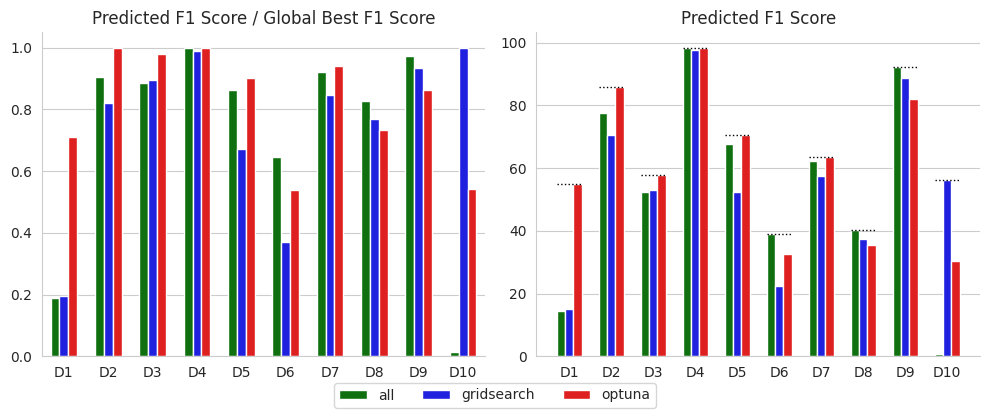

In [172]:
data=autoconf_final_results
filtered_data = data[(data['EXPERIMENT'] == 'DL') & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], categories=test_set_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

metrics = ['PERFORMANCE', 'PREDICTED_F1']
metric_labels = {
    'PERFORMANCE': 'Predicted F1 Score / Global Best F1 Score',
    'PREDICTED_F1': 'Predicted F1 Score'
}

# Prepare color palette
palette = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green'}

for i, metric in enumerate(metrics):
    ax = axes[i]

    temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].max().reset_index()

    sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                width=0.6, order=test_set_order, palette=palette)
    ax.set_title(metric_labels[metric])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x')

    # Remove frame on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if metric == 'PREDICTED_F1':
        # Compute maximum values for each TEST_SET
        max_values = temp_data.groupby('TEST_SET')[metric].max()
        
        # Draw horizontal lines for max values
        for j, test_set in enumerate(test_set_order):
            max_value = max_values[test_set]
            # Adjust the position to center the line over the bars (this might need tweaking)
            line_position = j - 0.3  # slight shift left to center the line
            ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.6, colors='black', linestyles=':', lw=1, alpha=1)

for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()
plt.savefig('./figures/dl_f1.png')
plt.show()


/tmp/ipykernel_3321675/529104951.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



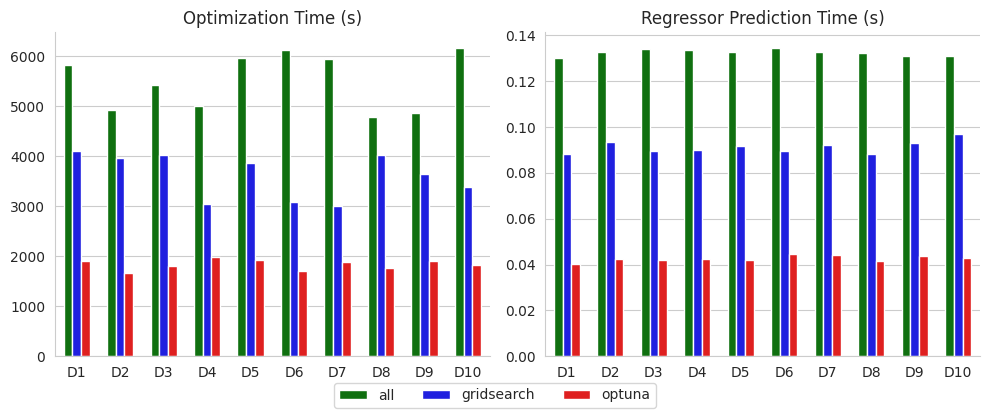

In [173]:
data=autoconf_final_results
filtered_data = data[(data['EXPERIMENT'] == 'DL') & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], categories=test_set_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

metrics = ['OPTIMIZATION_TIME', 'BEST_REGRESSOR_PREDICTION_TIME']
metric_labels = {
    'OPTIMIZATION_TIME': 'Optimization Time (s)',
    'BEST_REGRESSOR_PREDICTION_TIME': 'Regressor Prediction Time (s)'
}

# Prepare color palette
palette = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green'}

for i, metric in enumerate(metrics):
    ax = axes[i]

    temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].mean().reset_index()

    sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                width=0.6, order=test_set_order, palette=palette)
    ax.set_title(metric_labels[metric])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x')

    # Remove frame on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if metric == 'PREDICTED_F1':
        # Compute maximum values for each TEST_SET
        max_values = temp_data.groupby('TEST_SET')[metric].max()
        
        # Draw horizontal lines for max values
        for j, test_set in enumerate(test_set_order):
            max_value = max_values[test_set]
            # Adjust the position to center the line over the bars (this might need tweaking)
            line_position = j - 0.3  # slight shift left to center the line
            ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.6, colors='gold', linestyles='-', lw=2, alpha=0.5)

for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()
plt.savefig('./figures/dl_runtime.png')
plt.show()


Best reults for each dataset using DL approach.

In [174]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]
max_f1_rows

TEST_SET     DATASET EXPERIMENT REGRESSOR  VALIDATION_MSE   TEST_MSE  \
30       D1      optuna         DL        NN          2.2843   673.3898   
31       D2      optuna         DL        NN          3.2680   622.2104   
32       D3      optuna         DL        NN          2.2731  1465.1599   
33       D4      optuna         DL        NN          2.3466  2119.1541   
34       D5      optuna         DL        NN          2.6056   451.7998   
55       D6         all         DL        NN          2.9920   956.6033   
36       D7      optuna         DL        NN          3.4765   505.5668   
57       D8         all         DL        NN          3.8445  2506.5493   
58       D9         all         DL        NN          2.9069  4081.7026   
49      D10  gridsearch         DL        NN          3.0588   683.1649   

    PREDICTED_F1  GLOBAL_BEST_F1  PERFORMANCE  OPTIMIZATION_TIME  \
30       54.8287         77.0833       0.7113          1913.1566   
31       85.7813         85.8486       0.9992          1661.2780   
32       57.7832         59.0871       0.9779          1812.4902   
33       98.3769         98.5122       0.9986          1993.2178   
34       70.5331         78.2517       0.9014          1932.1066   
55       38.9905         60.2534       0.6471          6118.4568   
36       63.6813         67.7308       0.9402          1884.0386   
57       40.1214         48.5417       0.8265          4775.6928   
58       92.3308         94.9211       0.9727          4871.7982   
49       56.1133         56.1170       0.9999          3384.3442   

    BEST_REGRESSOR_FIT_TIME  BEST_REGRESSOR_PREDICTION_TIME  
30                  52.0396                          0.0403  
31                  38.4008                          0.0422  
32                  54.2702                          0.0421  
33                  46.8042                          0.0423  
34                  52.5151                          0.0419  
55                 167.2805                          0.1346  
36                  52.5906                          0.0443  
57                 102.4130                          0.1321  
58                 163.2741                          0.1311  
49                 100.7804                          0.0970

In [175]:
best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1']

# Apply string formatting to keep two decimals
for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:  # Check if the column is of object type, typically used for strings in pandas
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & optuna & NN & 54.83 & 77.083300 & 0.711300 \\
D2 & optuna & NN & 85.78 & 85.848600 & 0.999200 \\
D3 & optuna & NN & 57.78 & 59.087100 & 0.977900 \\
D4 & optuna & NN & 98.38 & 98.512200 & 0.998600 \\
D5 & optuna & NN & 70.53 & 78.251700 & 0.901400 \\
D6 & all & NN & 38.99 & 60.253400 & 0.647100 \\
D7 & optuna & NN & 63.68 & 67.730800 & 0.940200 \\
D8 & all & NN & 40.12 & 48.541700 & 0.826500 \\
D9 & all & NN & 92.33 & 94.921100 & 0.972700 \\
D10 & gridsearch & NN & 56.11 & 56.117000 & 0.999900 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3321675/3226024007.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3321675/3226024007.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3321675/3226024007.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Concatenated** comparison

/tmp/ipykernel_3321675/3696312954.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



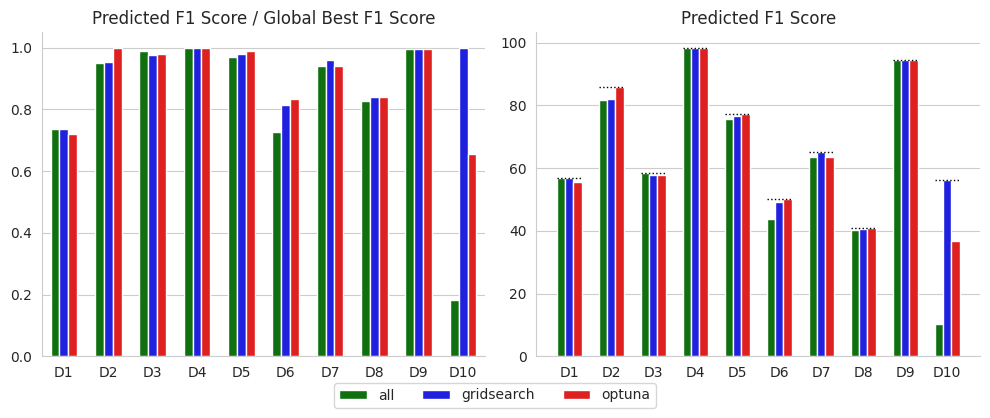

In [181]:
data=autoconf_final_results
filtered_data = data[ (data['REGRESSOR'] != 'SVR')  & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], categories=test_set_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

metrics = ['PERFORMANCE', 'PREDICTED_F1']
metric_labels = {
    'PERFORMANCE': 'Predicted F1 Score / Global Best F1 Score',
    'PREDICTED_F1': 'Predicted F1 Score'
}

# Prepare color palette
palette = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green'}

for i, metric in enumerate(metrics):
    ax = axes[i]

    temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].max().reset_index()

    sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                width=0.6, order=test_set_order, palette=palette)
    ax.set_title(metric_labels[metric])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x')

    # Remove frame on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if metric == 'PREDICTED_F1':
        # Compute maximum values for each TEST_SET
        max_values = temp_data.groupby('TEST_SET')[metric].max()
        
        # Draw horizontal lines for max values
        for j, test_set in enumerate(test_set_order):
            max_value = max_values[test_set]
            # Adjust the position to center the line over the bars (this might need tweaking)
            line_position = j - 0.3  # slight shift left to center the line
            ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.6, colors='black', linestyles=':', lw=1, alpha=1)

for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()
plt.savefig('./figures/all_f1.png')
plt.show()


/tmp/ipykernel_3321675/3402760534.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



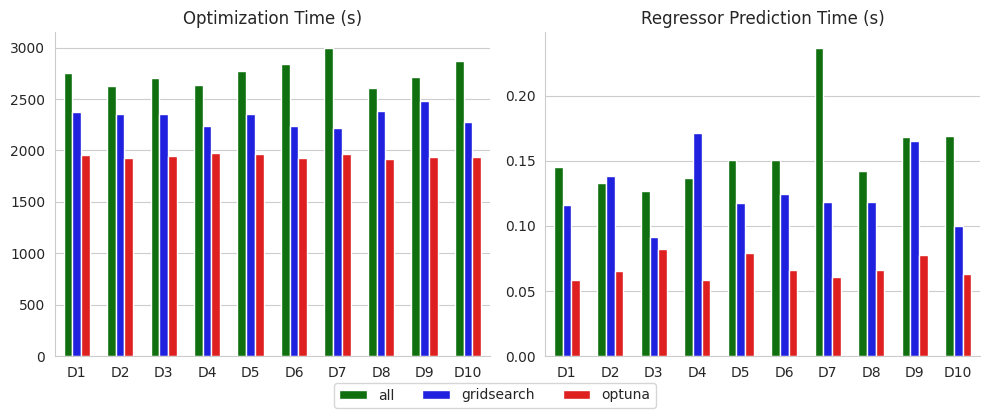

In [177]:
data=autoconf_final_results
filtered_data = data[ (data['REGRESSOR'] != 'SVR')  & (data['DATASET'].isin(['gridsearch', 'optuna', 'all']))]
test_set_order = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']
filtered_data['TEST_SET'] = pd.Categorical(filtered_data['TEST_SET'], categories=test_set_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

metrics = ['OPTIMIZATION_TIME', 'BEST_REGRESSOR_PREDICTION_TIME']
metric_labels = {
    'OPTIMIZATION_TIME': 'Optimization Time (s)',
    'BEST_REGRESSOR_PREDICTION_TIME': 'Regressor Prediction Time (s)'
}

# Prepare color palette
palette = {'gridsearch': 'blue', 'optuna': 'red', 'all': 'green'}

for i, metric in enumerate(metrics):
    ax = axes[i]

    temp_data = filtered_data.groupby(['TEST_SET', 'DATASET'])[metric].mean().reset_index()

    sns.barplot(ax=ax, data=temp_data, x='TEST_SET', y=metric, hue='DATASET',
                width=0.6, order=test_set_order, palette=palette)
    ax.set_title(metric_labels[metric])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x')

    # Remove frame on the top and right
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if metric == 'PREDICTED_F1':
        # Compute maximum values for each TEST_SET
        max_values = temp_data.groupby('TEST_SET')[metric].max()
        
        # Draw horizontal lines for max values
        for j, test_set in enumerate(test_set_order):
            max_value = max_values[test_set]
            # Adjust the position to center the line over the bars (this might need tweaking)
            line_position = j - 0.3  # slight shift left to center the line
            ax.hlines(y=max_value, xmin=line_position, xmax=line_position + 0.6, colors='gold', linestyles='-', lw=2, alpha=0.5)

for ax in axes:
    ax.get_legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()
plt.savefig('./figures/all_runtime.png')
plt.show()


Best reults for each dataset using DL approach.

In [178]:
idx = filtered_data.groupby('TEST_SET')['PREDICTED_F1'].idxmax()
max_f1_rows = filtered_data.loc[idx]
max_f1_rows

TEST_SET     DATASET   EXPERIMENT                 REGRESSOR  \
10        D1  gridsearch  AutoSKLEARN  automl_gradient_boosting   
31        D2      optuna           DL                        NN   
22        D3         all  AutoSKLEARN  automl_gradient_boosting   
33        D4      optuna           DL                        NN   
4         D5      optuna  AutoSKLEARN        automl_extra_trees   
5         D6      optuna  AutoSKLEARN        automl_extra_trees   
106       D7  gridsearch      SKLEARN     RandomForestRegressor   
197       D8      optuna      SKLEARN     RandomForestRegressor   
108       D9  gridsearch      SKLEARN     RandomForestRegressor   
209      D10  gridsearch      SKLEARN          LinearRegression   

     VALIDATION_MSE      TEST_MSE  PREDICTED_F1  GLOBAL_BEST_F1  PERFORMANCE  \
10              NaN  5.178951e+02       56.7742         77.0833       0.7365   
31           3.2680  6.222104e+02       85.7813         85.8486       0.9992   
22              NaN  3.014862e+02       58.5045         59.0871       0.9901   
33           2.3466  2.119154e+03       98.3769         98.5122       0.9986   
4               NaN  3.388932e+02       77.3673         78.2517       0.9887   
5               NaN  4.288079e+02       50.2077         60.2534       0.8333   
106         10.5038  5.639907e+02       65.0340         67.7308       0.9602   
197         32.6015  1.840376e+02       40.7395         48.5417       0.8393   
108         19.8755  2.556723e+03       94.5097         94.9211       0.9957   
209        230.9267  7.039443e+31       56.1170         56.1170       1.0000   

     OPTIMIZATION_TIME  BEST_REGRESSOR_FIT_TIME  \
10          10808.9914                      NaN   
31           1661.2780                  38.4008   
22          10834.6047                      NaN   
33           1993.2178                  46.8042   
4           10871.2538                      NaN   
5           10843.3462                      NaN   
106          1447.3663                  18.5078   
197           662.9876                  27.6744   
108          2578.0389                 104.1369   
209             0.1364                   0.0711   

     BEST_REGRESSOR_PREDICTION_TIME  
10                           0.5339  
31                           0.0422  
22                           0.5711  
33                           0.0423  
4                            0.3917  
5                            0.2923  
106                          0.1252  
197                          0.1392  
108                          0.5559  
209                          0.0036

In [179]:
best_table = max_f1_rows[['TEST_SET', 'DATASET', 'REGRESSOR', 'PREDICTED_F1','GLOBAL_BEST_F1','PERFORMANCE']]
columns_to_format = ['PREDICTED_F1']

# Apply string formatting to keep two decimals
for column in columns_to_format:
    best_table[column] = best_table[column].map('{:.2f}'.format)
best_table.columns = [col.replace('_', ' ') for col in best_table.columns]

for column in best_table.columns:
    if best_table[column].dtype == object:  # Check if the column is of object type, typically used for strings in pandas
        best_table[column] = best_table[column].apply(lambda x: x.replace('_', ' '))
best_table['REGRESSOR'] = best_table['REGRESSOR'].str.replace('automl', '', case=False)

latex_table = best_table.to_latex(index=False, header=True, column_format='|c|c|c|c|c|c|', longtable=False)
print(latex_table)

\begin{tabular}{|c|c|c|c|c|c|}
\toprule
TEST SET & DATASET & REGRESSOR & PREDICTED F1 & GLOBAL BEST F1 & PERFORMANCE \\
\midrule
D1 & gridsearch &  gradient boosting & 56.77 & 77.083300 & 0.736500 \\
D2 & optuna & NN & 85.78 & 85.848600 & 0.999200 \\
D3 & all &  gradient boosting & 58.50 & 59.087100 & 0.990100 \\
D4 & optuna & NN & 98.38 & 98.512200 & 0.998600 \\
D5 & optuna &  extra trees & 77.37 & 78.251700 & 0.988700 \\
D6 & optuna &  extra trees & 50.21 & 60.253400 & 0.833300 \\
D7 & gridsearch & RandomForestRegressor & 65.03 & 67.730800 & 0.960200 \\
D8 & optuna & RandomForestRegressor & 40.74 & 48.541700 & 0.839300 \\
D9 & gridsearch & RandomForestRegressor & 94.51 & 94.921100 & 0.995700 \\
D10 & gridsearch & LinearRegression & 56.12 & 56.117000 & 1.000000 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3321675/3226024007.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3321675/3226024007.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3321675/3226024007.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Benchmarking:** CENSUS data